In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Stage 1

### Descriptive Statistics

In [ ]:
df =  pd.read_csv('SBAnational_Split.csv')

pd.set_option('display.max_column', None)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
1,1000554001,PAUL E. & JUDY A. FAATZ,KINSMAN,OH,44428,CORTLAND SAVINGS & BK. CO.,OH,0,28-Feb-97,1997,137,2,1,0,0,1,0,N,Y,18-Apr-02,30-Jun-97,"$47,000.00",$0.00,CHGOFF,"$14,084.00","$47,000.00","$37,600.00"
2,1000653000,LARRY SCHOETTMER FORD INC,EDINBURGH,IN,46124,JPMORGAN CHASE BANK NATL ASSOC,IN,0,11-Jun-80,1980,120,16,2,0,0,0,0,Y,N,4-Oct-89,31-Jul-80,"$197,485.00",$0.00,CHGOFF,"$44,374.00","$200,000.00","$150,000.00"
3,1000726007,NEW DIMENSION HOMES INC,CLINTON (CENSUS NAME FOR CLINT,ME,4927,WELLS FARGO BANK NATL ASSOC,SD,236115,7-Feb-06,2006,167,9,1,0,9,1,1,0,N,26-Jun-14,28-Feb-06,"$1,350,000.00",$0.00,CHGOFF,"$1,043,508.00","$1,350,000.00","$1,012,500.00"
4,1000735003,Mykols Marine Inc.,Spring Lake,MI,49417,WELLS FARGO BANK NATL ASSOC,SD,713930,31-Mar-97,1997,7,10,1,0,0,1,0,0,N,4-Oct-05,28-Feb-98,"$25,000.00",$0.00,CHGOFF,"$23,484.00","$25,000.00","$12,500.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258966 entries, 0 to 258965
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   LoanNr_ChkDgt      258966 non-null  int64 
 1   Name               258955 non-null  object
 2   City               258962 non-null  object
 3   State              258965 non-null  object
 4   Zip                258966 non-null  int64 
 5   Bank               258791 non-null  object
 6   BankState          258790 non-null  object
 7   NAICS              258966 non-null  int64 
 8   ApprovalDate       258966 non-null  object
 9   ApprovalFY         258966 non-null  int64 
 10  Term               258966 non-null  int64 
 11  NoEmp              258966 non-null  int64 
 12  NewExist           258966 non-null  int64 
 13  CreateJob          258966 non-null  int64 
 14  RetainedJob        258966 non-null  int64 
 15  FranchiseCode      258966 non-null  int64 
 16  UrbanRural         2

Terdapat kolom yang memiliki tipe data tidak sesuai, contohnya seperti UrbanRural, NewExist, SBA_Appv, etc.

In [ ]:
# Kolom yang akan diubah menjadi tipe data 'object'
cols_to_convert = ['LoanNr_ChkDgt', 'Zip', 'NAICS', 'ApprovalFY', 'NewExist',
                  'UrbanRural', 'RevLineCr', 'FranchiseCode']

# Ubah tipe data kolom menjadi 'object'
df[cols_to_convert] = df[cols_to_convert].astype('object')

In [ ]:
# Kolom yang akan diubah menjadi tipe data 'float'
cols_to_convert = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

# Ubah tipe data kolom menjadi 'float'
df[cols_to_convert] = df[cols_to_convert].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2,0,0,0,0,N,N,24-Jun-91,22-Jul-80,600000.0,0.0,CHGOFF,208959.0,600000.0,499998.0
1,1000554001,PAUL E. & JUDY A. FAATZ,KINSMAN,OH,44428,CORTLAND SAVINGS & BK. CO.,OH,0,28-Feb-97,1997,137,2,1,0,0,1,0,N,Y,18-Apr-02,30-Jun-97,47000.0,0.0,CHGOFF,14084.0,47000.0,37600.0
2,1000653000,LARRY SCHOETTMER FORD INC,EDINBURGH,IN,46124,JPMORGAN CHASE BANK NATL ASSOC,IN,0,11-Jun-80,1980,120,16,2,0,0,0,0,Y,N,4-Oct-89,31-Jul-80,197485.0,0.0,CHGOFF,44374.0,200000.0,150000.0
3,1000726007,NEW DIMENSION HOMES INC,CLINTON (CENSUS NAME FOR CLINT,ME,4927,WELLS FARGO BANK NATL ASSOC,SD,236115,7-Feb-06,2006,167,9,1,0,9,1,1,0,N,26-Jun-14,28-Feb-06,1350000.0,0.0,CHGOFF,1043508.0,1350000.0,1012500.0
4,1000735003,Mykols Marine Inc.,Spring Lake,MI,49417,WELLS FARGO BANK NATL ASSOC,SD,713930,31-Mar-97,1997,7,10,1,0,0,1,0,0,N,4-Oct-05,28-Feb-98,25000.0,0.0,CHGOFF,23484.0,25000.0,12500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258966 entries, 0 to 258965
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      258966 non-null  object 
 1   Name               258955 non-null  object 
 2   City               258962 non-null  object 
 3   State              258965 non-null  object 
 4   Zip                258966 non-null  object 
 5   Bank               258791 non-null  object 
 6   BankState          258790 non-null  object 
 7   NAICS              258966 non-null  object 
 8   ApprovalDate       258966 non-null  object 
 9   ApprovalFY         258966 non-null  object 
 10  Term               258966 non-null  int64  
 11  NoEmp              258966 non-null  int64  
 12  NewExist           258966 non-null  object 
 13  CreateJob          258966 non-null  int64  
 14  RetainedJob        258966 non-null  int64  
 15  FranchiseCode      258966 non-null  object 
 16  Ur

Terdapat kolom yang memiliki missing-value seperti Name, City, State, Bank, BankState, RevLineCr, LowDoc, ChgOffDate, DisbursementDate.

In [ ]:
num = {'Term', 'NoEmp', 'CreateJob', 'RetainedJob',
          'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'}
cat = {'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate',
          'ApprovalFY', 'NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ChgOffDate',
          'DisbursementDate',  'FranchiseCode', 'MIS_Status'}

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
DisbursementGross,258966.00,152469.37,238123.50,4000.00,30900.75,70893.50,158641.00,6206000.00
RetainedJob,258966.00,26.09,440.22,0.00,0.00,1.00,4.00,9500.00
CreateJob,258966.00,23.70,439.76,0.00,0.00,0.00,1.00,8800.00
BalanceGross,258966.00,3.25,1627.03,0.00,0.00,0.00,0.00,827875.00
NoEmp,258966.00,9.09,71.63,0.00,2.00,4.00,8.00,9999.00
Term,258966.00,93.10,69.51,0.00,55.00,84.00,87.00,480.00
GrAppv,258966.00,137714.64,234286.56,1000.00,25000.00,50000.00,135000.00,4000000.00
SBA_Appv,258966.00,101665.68,186904.78,500.00,12500.00,26005.00,96900.00,4000000.00
ChgOffPrinGr,258966.00,21141.99,76250.87,0.00,0.00,0.00,14606.75,3512596.00


- Pada RetainedJob, nilai 75% adalah 4 tetapi nilai maksimumnya adalah 9500, begitu juga dengan CreateJob memiliki nilai pada 75% sebesar 1 sedangkan nilai maksimumnya adalah 8800, serta NoEmp nilai pada 75% sebesar 8 sedangkan nilai maksimumnya 9999.

In [ ]:
df[cat].describe().T

,count,unique,top,freq
UrbanRural,258966,3,1,147052
City,258962,19832,LOS ANGELES,3871
MIS_Status,258966,2,P I F,175428
LoanNr_ChkDgt,258966,258966,1000093009,1
State,258965,51,CA,37290
ApprovalFY,258966,24,2006,65753
NewExist,258966,3,1,176795
NAICS,258966,1244,0,48658
LowDoc,258733,7,N,240509
DisbursementDate,258479,3120,30-Apr-07,6377


- Kolom Zip memiliki nilai minimum 0 yang mungkin tidak sesuai sebagai kode pos yang valid.
- Kolom ChgOffDate, NAICS, City, BankState, DisbursementDate, FranchiseCode, ApprovalFY, State, Name, ApprovalDate, Zip, LoanNr_ChkDgt, dan Bank memiliki ketegori (unique values) terlalu banyak sehingga pada data preprocessing bisa didrop kolomnya atau dilakukan feature extraction (membuat derivative feature dari feature yang ada).

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     11
City                      4
State                     1
Zip                       0
Bank                    175
BankState               176
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                36
LowDoc                  233
ChgOffDate           173173
DisbursementDate        487
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

### Univariate Analysis

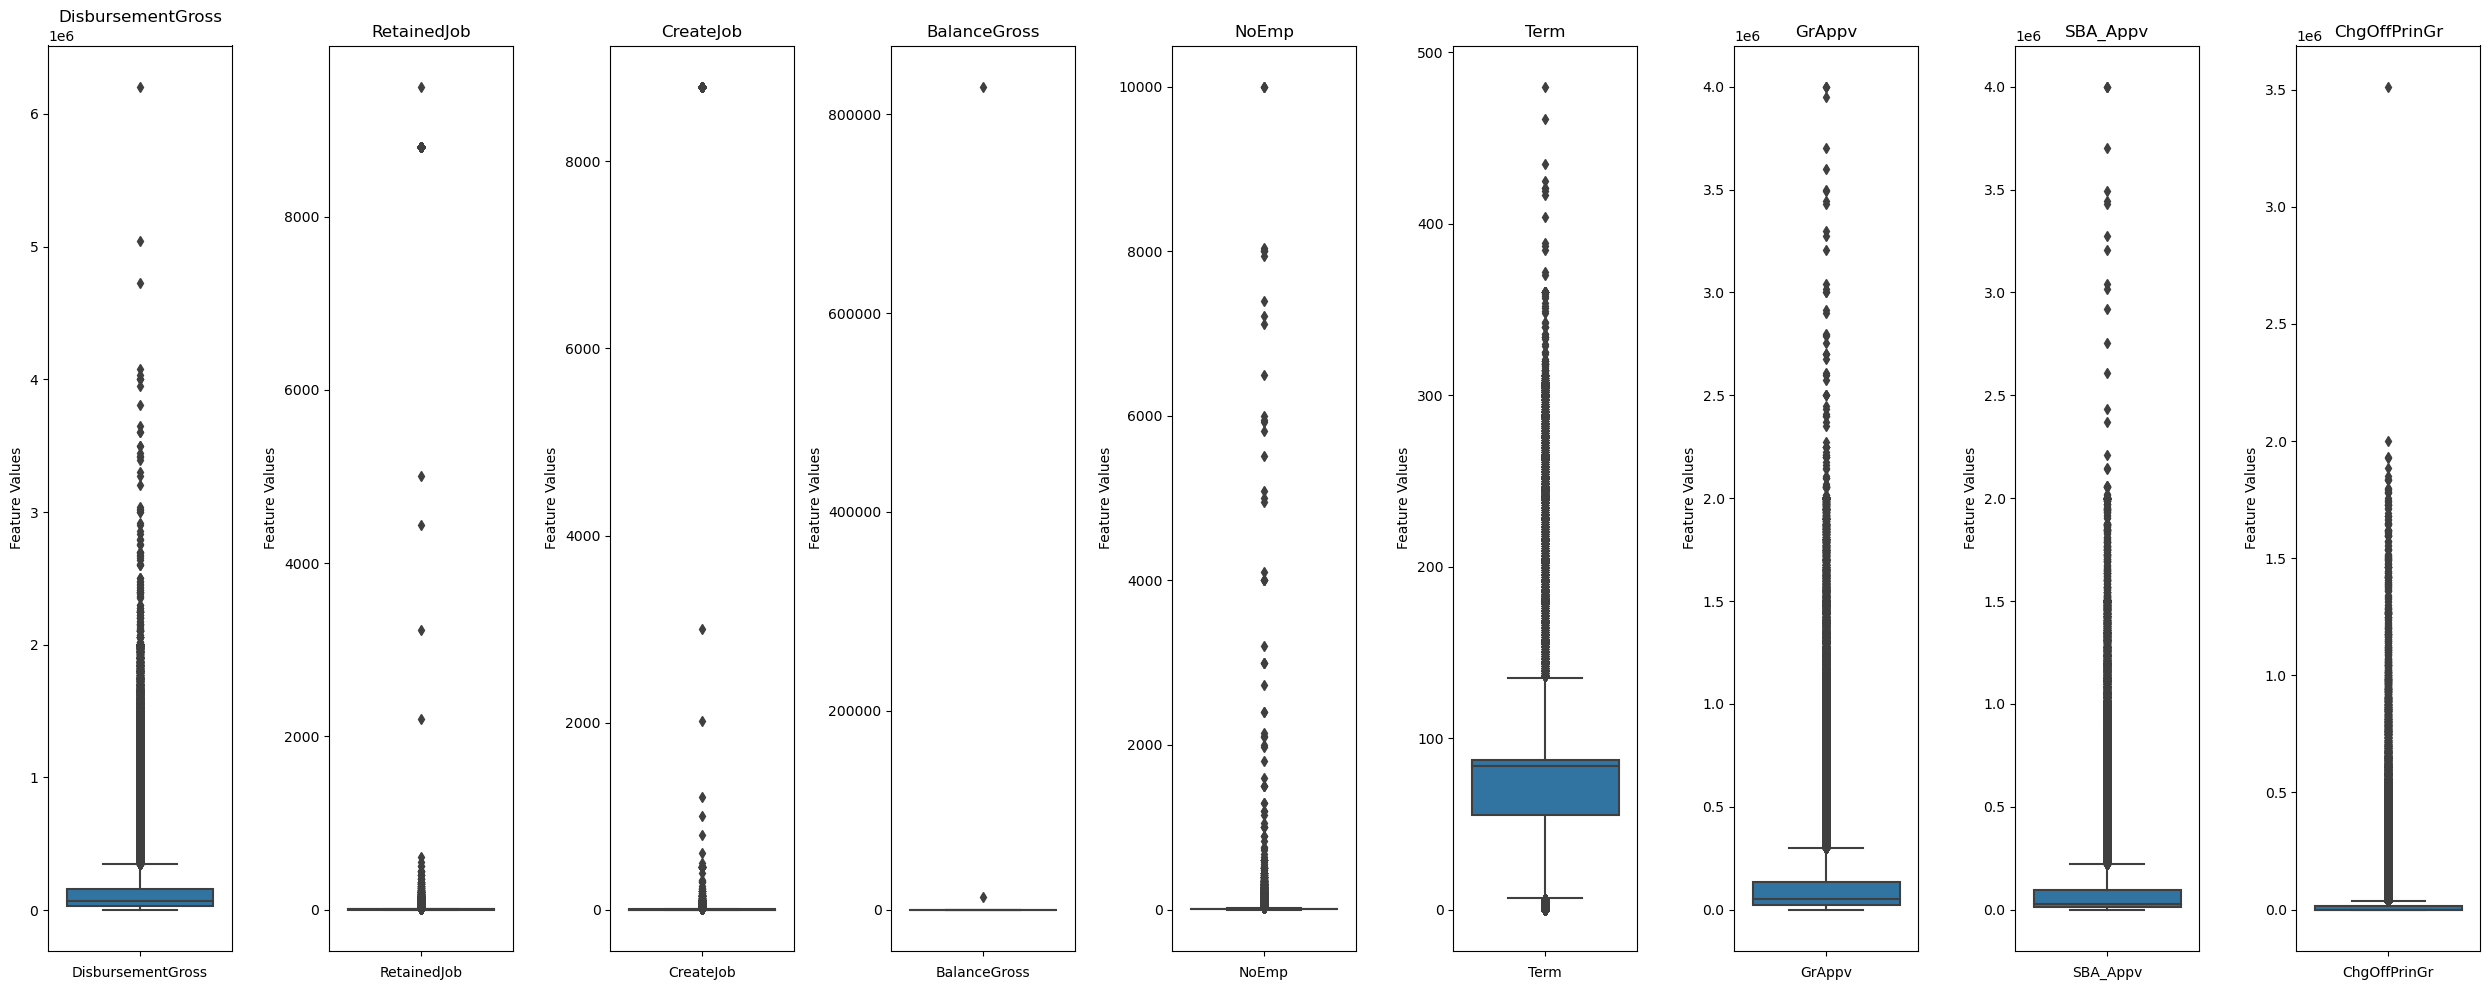

In [ ]:
fig, axes = plt.subplots(1, len(num), figsize=(25, 10))

for i, feature in enumerate(num):
    sns.boxplot(y=feature, data=df, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Feature Values')
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

Terlihat ada banyak outliers pada kolom-kolom numerik. Oleh karena itu, pada tahap preprocessing disarankan untuk mengatasi outliers yang terdapat pada data.

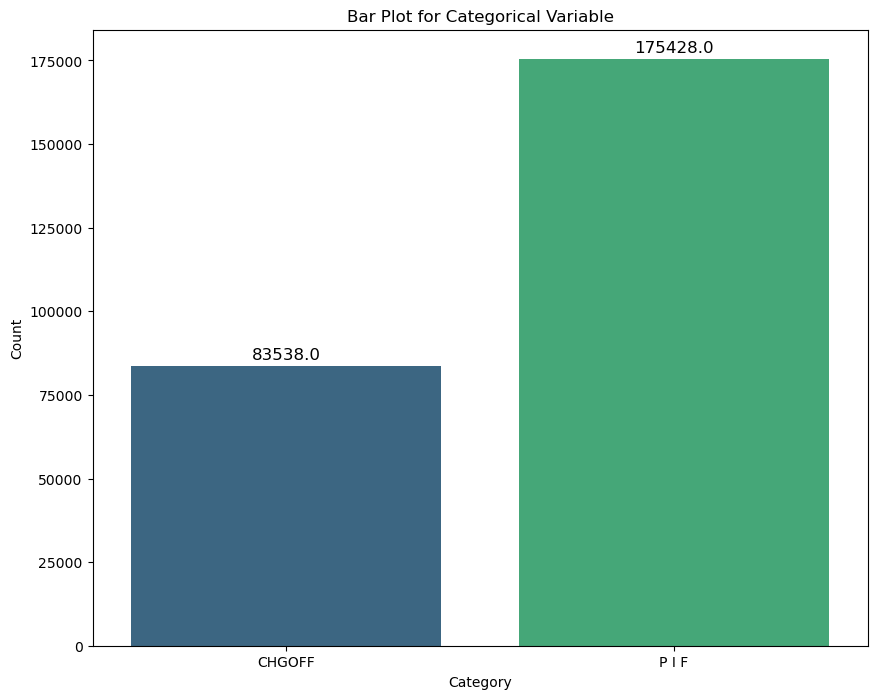

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='MIS_Status', data=df, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot for Categorical Variable')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Kolom target yaitu MIS_Status memiliki 2 kategori yaitu CHGOFF (gagal bayar)  dan PIF (lunas) dengan proporsi yang tidak seimbang. Oleh karena itu, pada data preprocessing disarankan untuk menghandle class imbalance.

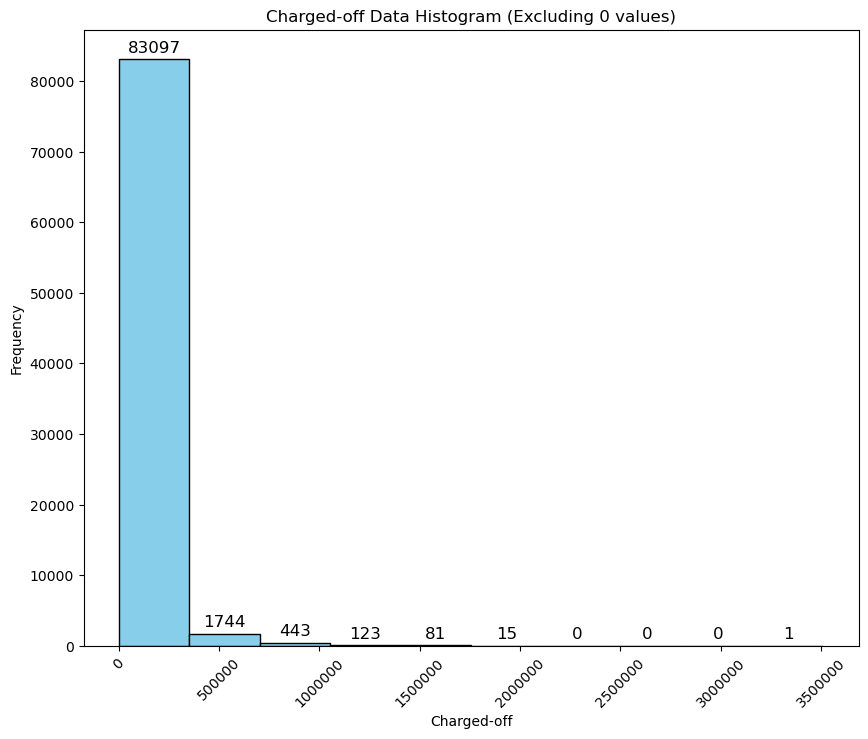

In [ ]:
filtered_ChgOffPrinGr = [value for value in df['ChgOffPrinGr'] if value != 0]

plt.figure(figsize=(10, 8))
plt.hist(filtered_ChgOffPrinGr, bins=10, color='skyblue', edgecolor='black')

plt.title('Charged-off Data Histogram (Excluding 0 values)')
plt.xlabel('Charged-off')
plt.ylabel('Frequency')

for bar in plt.gca().patches:
    plt.annotate(f'{bar.get_height():.0f}', (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

plt.show()

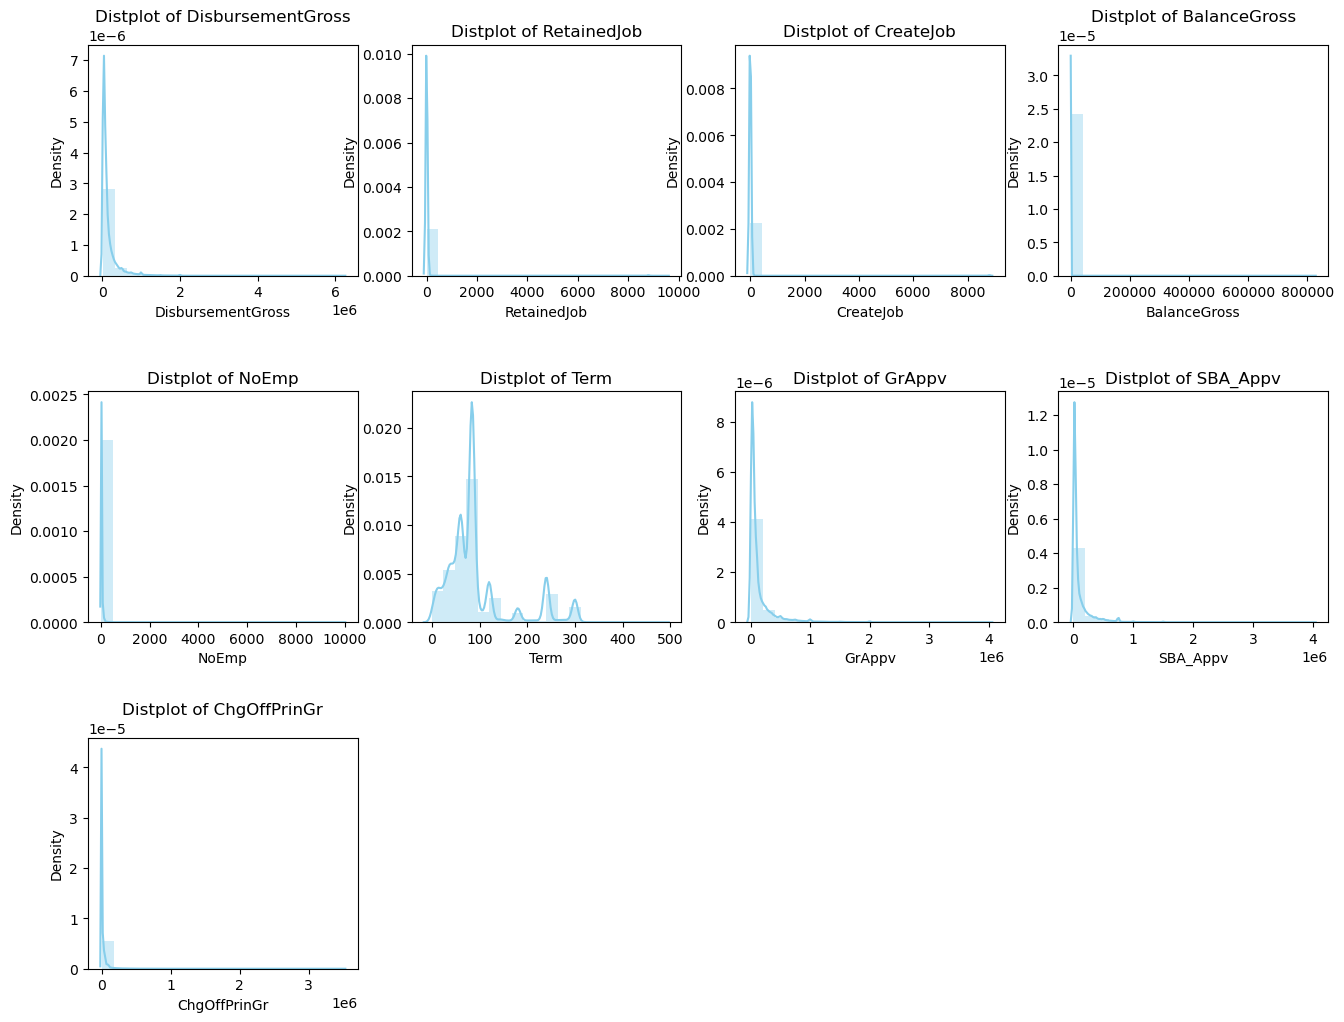

In [ ]:
plt.figure(figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)

for i, variable in enumerate(num):
    plt.subplot(3, 4, i + 1)
    sns.distplot(df[variable], bins=20, color='skyblue')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.title(f'Distplot of {variable}')

plt.show()

Terlihat bahwa pada distribusi data pada kolom-kolom numerik cenderung positively skewed. Oleh karena itu, pada preprocessing disarankan untuk melakukan transformasi data.

### Multivariate Analysis


In [ ]:
df['MIS_Status_int'] = df['MIS_Status'].replace('P I F', 1).replace('CHGOFF', 0)

In [ ]:
num = {'Term', 'NoEmp', 'CreateJob', 'RetainedJob',
       'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv',
       'SBA_Appv', 'MIS_Status_int'}

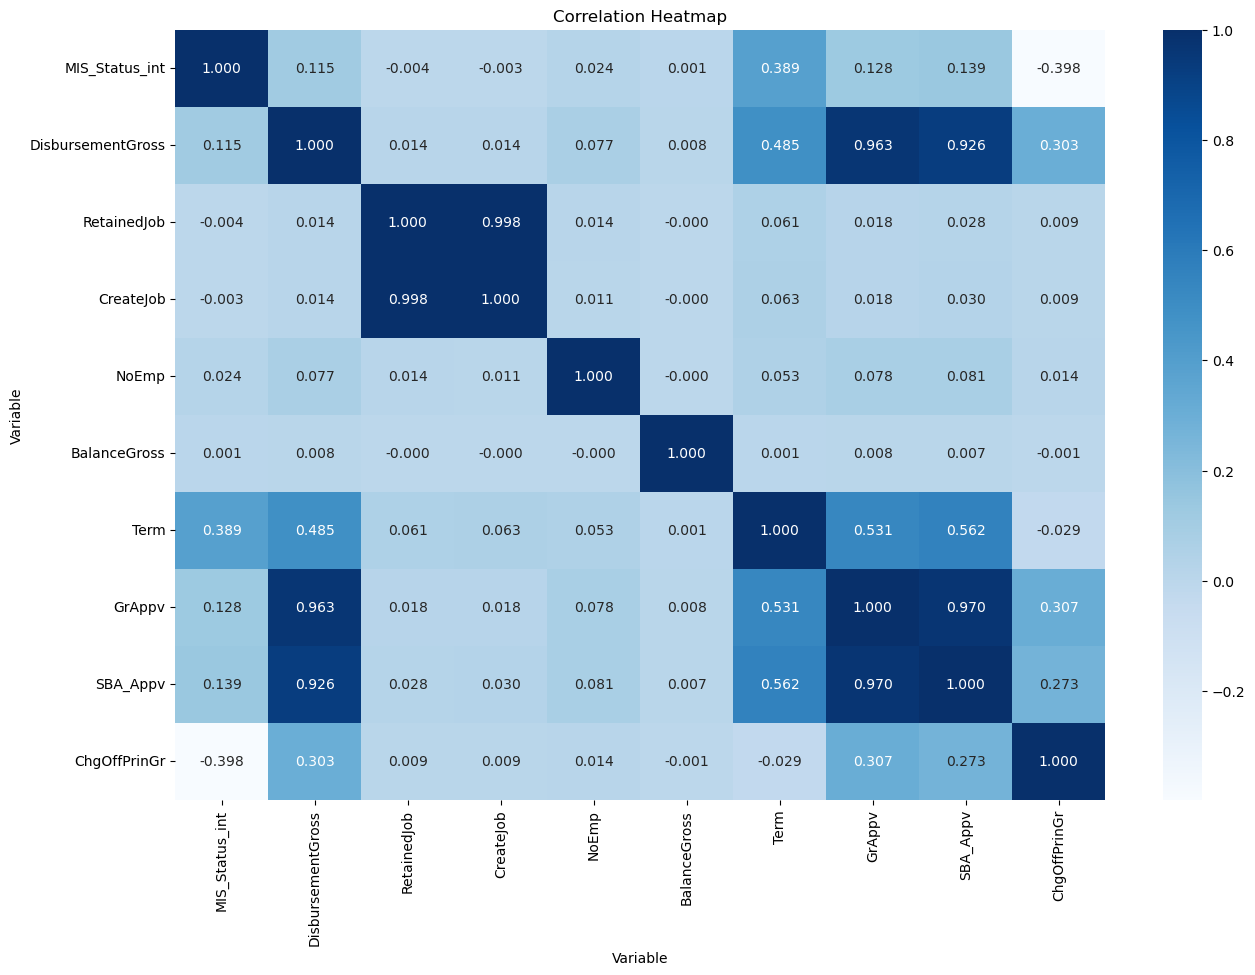

In [ ]:
num_corr = df[num].corr()

plt.figure(figsize=(15,10))
sns.heatmap(num_corr, cmap='Blues', annot = True, fmt='.3f')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.title('Correlation Heatmap')
plt.show()

- Fitur Retained Job memiliki korelasi yang tinggi dengan Create Job.
- Fitur GrAppv juga memiliki korelasi yang tinggi dengan Disbursement Gross dan SBA_Appv.
- Oleh karena itu, pada preprocessing disarankan untuk melakukan feature extraction (membuat derivative feature) atau pilih salah satu kolom dari beberapa feature yang memiliki korelasi kuat (terindikasi redundant).

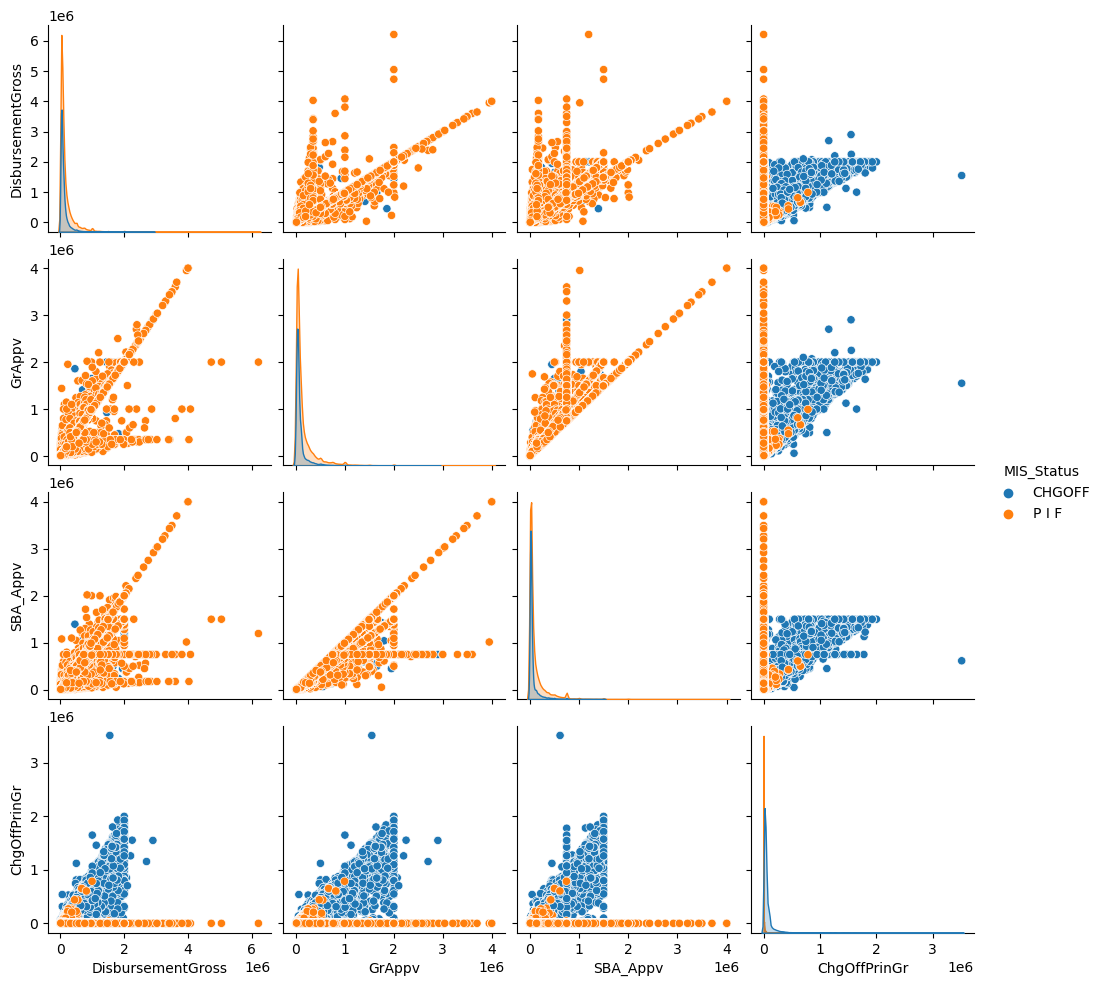

In [ ]:
test = {'SBA_Appv', 'GrAppv', 'ChgOffPrinGr', 'DisbursementGross', 'MIS_Status'}

sns.pairplot(df[test], hue='MIS_Status')
plt.show()

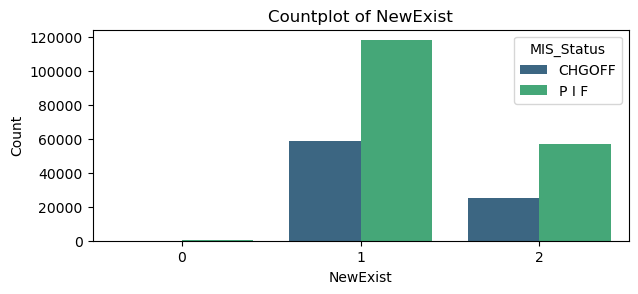

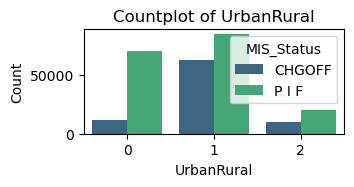

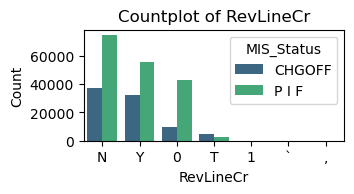

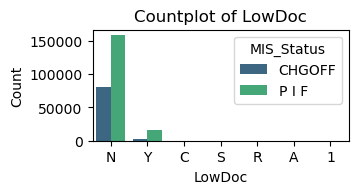

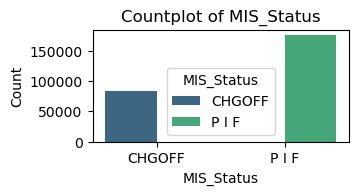

In [ ]:
cat = ['NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status']

# Countplot untuk melihat korelasi antar fitur kategorikal
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df, x=cat[i], hue='MIS_Status', palette='viridis')
    plt.title(f'Countplot of {cat[i]}')
    plt.xlabel(cat[i])
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

- Pada kolom RevLineCr terdapat invalid data seperti 0, T, dan 1.
- Pada kolom LowDoc terdapat invalid data seperti C, S, R, A, I meskipun dalam jumlah yang sedikit.
- Pada kolom UrbanRural, terlalu banyak kategori 0 (Unknown) sehingga kurang merepresentasikan kolom UrbanRural.
- Oleh karena itu, pada preprocessing disarankan untuk menghandle invalid data pada kolom RevLineCr dan LowDoc serta menghapus kolom UrbanRural karena dianggap kurang relevan.

### Business Insight

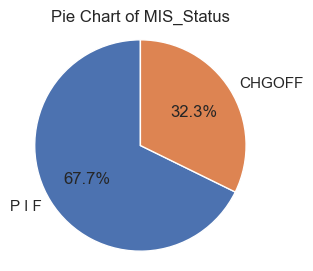

In [ ]:
# Hitung jumlah masing-masing nilai MIS_Status
mis_status_counts = df['MIS_Status'].value_counts()

# Buat pie chart dengan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(3, 3))
plt.pie(mis_status_counts, labels=mis_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of MIS_Status')
plt.axis('equal')
plt.show()

Kebanyakan small business dapat membayar penuh pinjamannya, hanya 32,3% yang tidak dapat membayar secara lunas.

In [ ]:
# Hitung total ChgOffPrinGr
nominal_gagal_bayar = df['ChgOffPrinGr'].sum()
print(f'Nominal Gagal Bayar: {nominal_gagal_bayar}')

Nominal Gagal Bayar: 5475056712.0


In [ ]:
df['Industry'] = df['NAICS'].astype(str).apply(lambda x: x[:2])
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

df['Industry'].fillna('Unknown', inplace=True)

Text(0.5, 1.0, 'Jumlah Nominal Pinjaman per Industri')

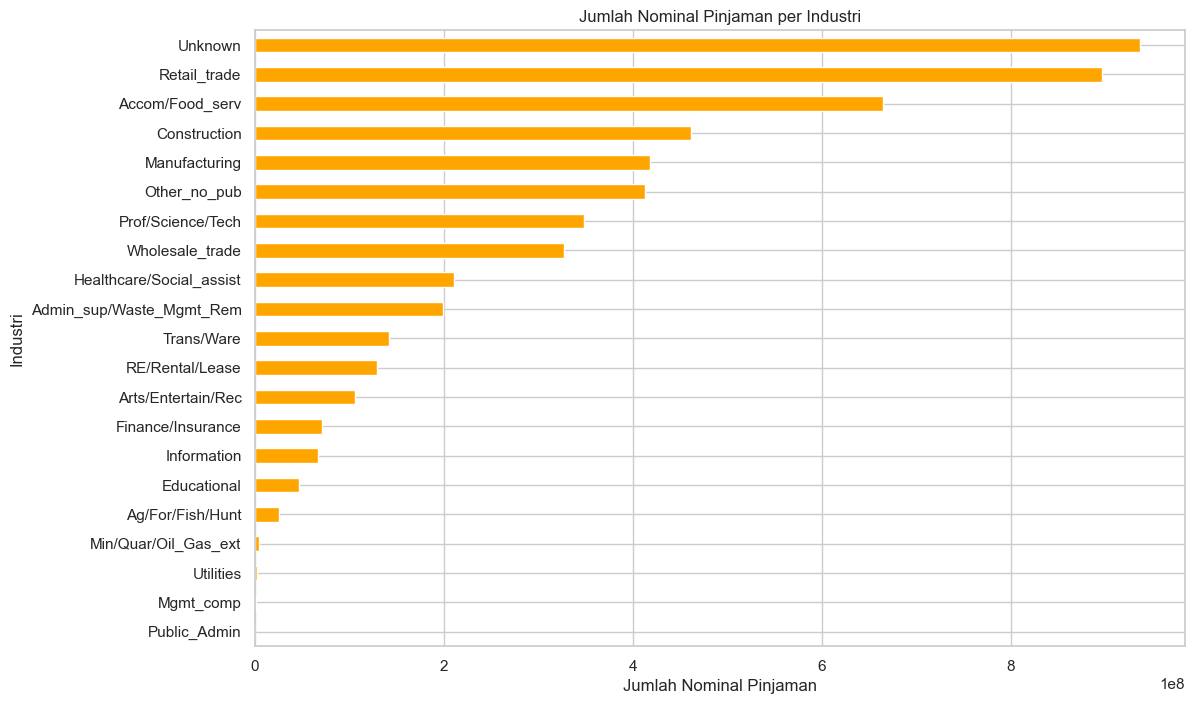

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah nominal pinjaman per industri
industry_loan_amounts = df.groupby('Industry')['ChgOffPrinGr'].sum()

# Group data untuk PIF dan CHGOFF per industri
industry_status_counts = df.groupby(['Industry', 'MIS_Status_int']).size().unstack()

# Plot horizontal bar chart untuk jumlah nominal pinjaman
fig, ax1 = plt.subplots(figsize=(12, 8))
industry_loan_amounts.sort_values().plot(kind='barh', ax=ax1, color='orange')
ax1.set_xlabel('Jumlah Nominal Pinjaman')
ax1.set_ylabel('Industri')
ax1.set_title('Jumlah Nominal Pinjaman per Industri')

- Selain unknown industri, industri retail trade dan accom/food_serv memiliki jumlah pinjaman yang besar dibandingkan industri lainnya.
- Selain unknown industri, industri retail trade dan construction merupakan industri dengan jumlah peminjam yang lebih besar dibandingkan industri lainnya.

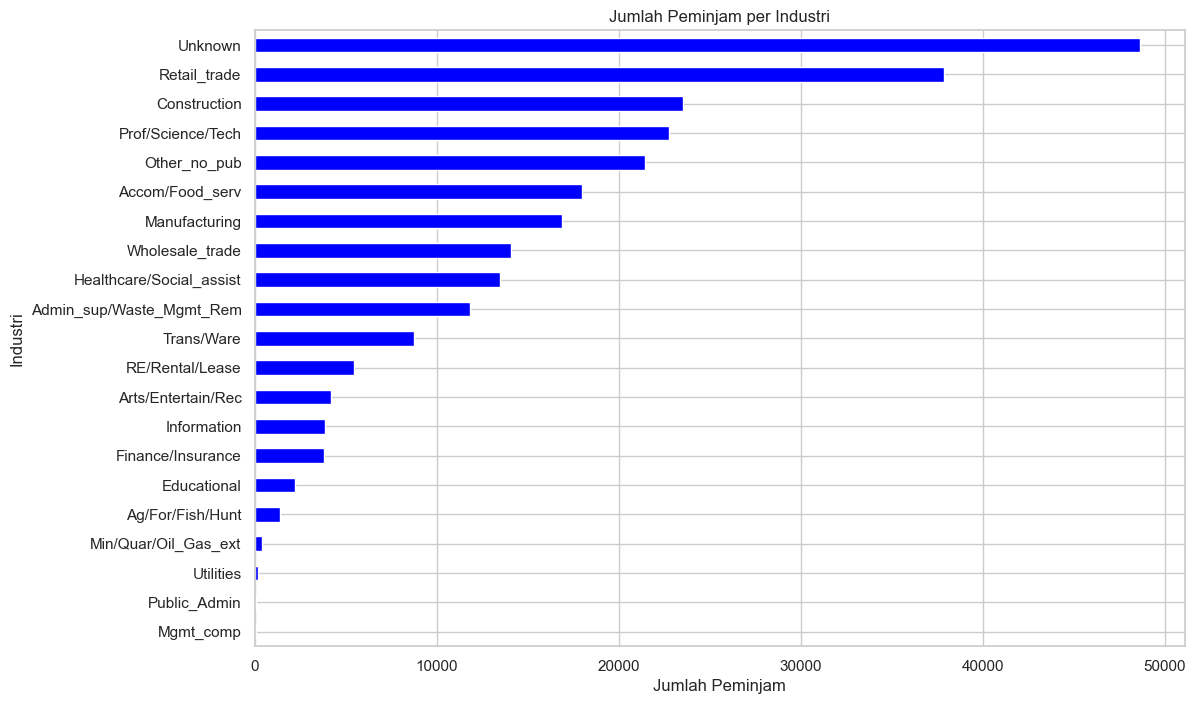

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah peminjam (pinjaman) per industri
industry_borrowers_counts = df['Industry'].value_counts()

# Plot bar chart untuk jumlah peminjam per industri
plt.figure(figsize=(12, 8))
industry_borrowers_counts.sort_values().plot(kind='barh', color='blue')
plt.xlabel('Jumlah Peminjam')
plt.ylabel('Industri')
plt.title('Jumlah Peminjam per Industri')
plt.show()

Industri di bidang public admin, mgmt_comp, dan utilities memiliki jumlah pinjaman yang kecil dan jumlah peminjam yang kecil dibandingkan industri lainnya.

In [ ]:
# Cek Persentase CHGOFF untuk tiap Industri

df_ind = df.groupby(['Industry', 'MIS_Status_int'])['Industry'].count().unstack('MIS_Status_int')
df_ind['Persentase'] = df_ind[0] / (df_ind[0] + df_ind[1])
df_ind['Persentase'].sort_values(ascending=False)

Industry
RE/Rental/Lease            0.48
Finance/Insurance          0.47
Trans/Ware                 0.43
Construction               0.39
Information                0.39
Admin_sup/Waste_Mgmt_Rem   0.39
Retail_trade               0.38
Educational                0.38
Accom/Food_serv            0.37
Wholesale_trade            0.37
Arts/Entertain/Rec         0.35
Other_no_pub               0.34
Prof/Science/Tech          0.33
Manufacturing              0.30
Utilities                  0.28
Public_Admin               0.22
Mgmt_comp                  0.21
Healthcare/Social_assist   0.20
Unknown                    0.17
Ag/For/Fish/Hunt           0.16
Min/Quar/Oil_Gas_ext       0.14
Name: Persentase, dtype: float64

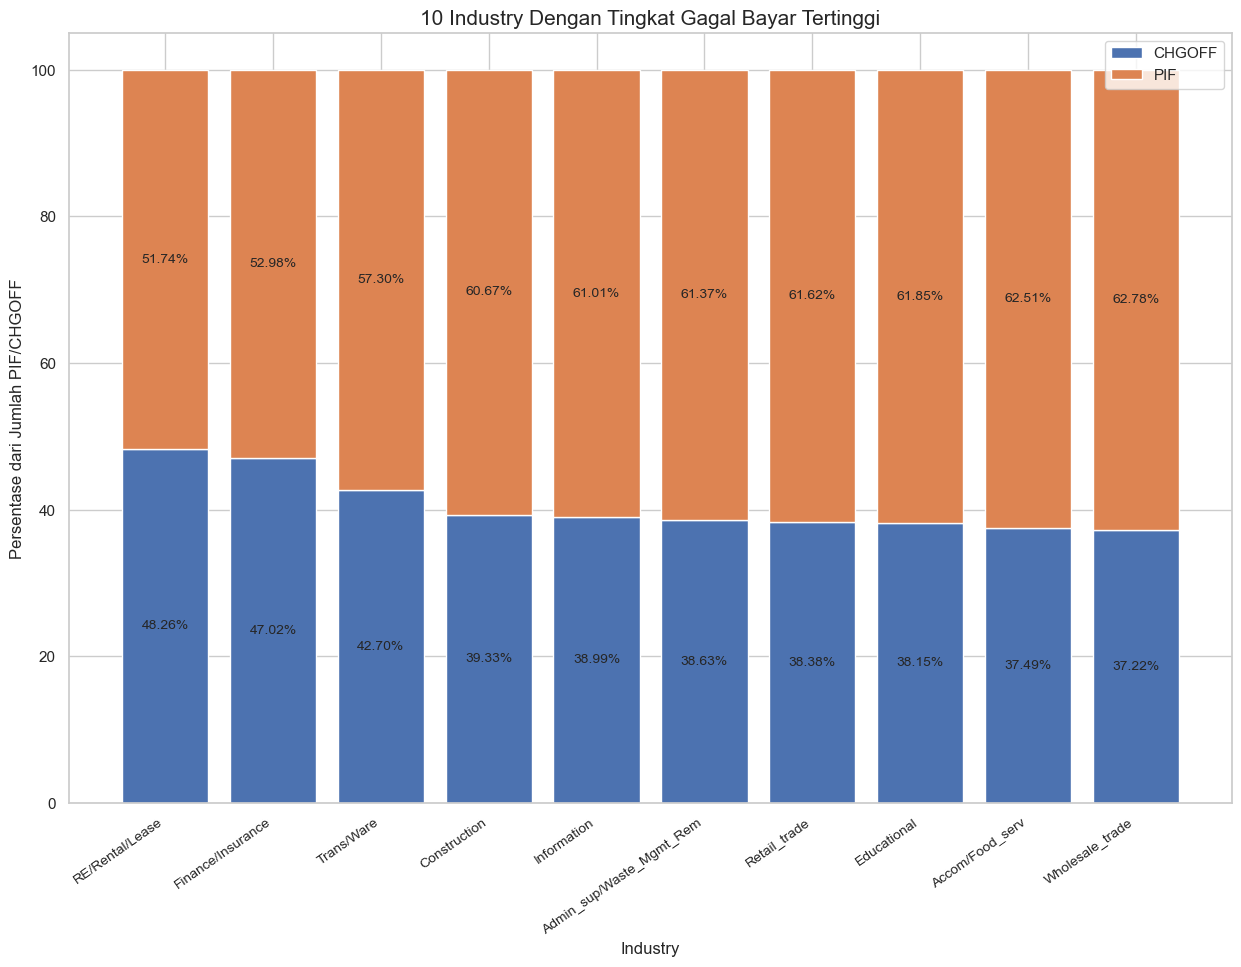

In [ ]:
import matplotlib.pyplot as plt

# Membuat fungsi stacked bar
def stacked(df, col, ax, stack_col='MIS_Status_int'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    # Menghitung persentase CHGOFF
    data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

    # Mengambil 10 data dengan persentase CHGOFF terbesar
    top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=False).head(10)

    # Plot bar CHGOFF di atas PIF dengan persentase
    ax.bar(top_10.index, (top_10[0] / (top_10[0] + top_10[1])) * 100, label='CHGOFF')

    # Plot bar PIF di bawah CHGOFF dengan persentase
    ax.bar(top_10.index, (top_10[1] / (top_10[0] + top_10[1])) * 100, label='PIF', bottom=(top_10[0] / (top_10[0] + top_10[1])) * 100)

    # Tambahkan label persentase CHGOFF dan PIF
    for index, row in top_10.iterrows():
        pif_percentage = (row[1] / (row[0] + row[1])) * 100
        chgoff_percentage = (row[0] / (row[0] + row[1])) * 100
        ax.text(index, chgoff_percentage / 2, f'{chgoff_percentage:.2f}%', ha='center', va='center', fontsize=10)
        ax.text(index, chgoff_percentage + pif_percentage / 2, f'{pif_percentage:.2f}%', ha='center', va='center', fontsize=10)

    # Mengatur label pada sumbu x
    ax.set_xticklabels(top_10.index, rotation=35, horizontalalignment='right', fontsize=10)

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(15, 10))

# Memanggil fungsi stacked
stacked(df=df, col='Industry', ax=ax)

# Menambahkan judul dan label pada grafik
ax.set_title('10 Industry Dengan Tingkat Gagal Bayar Tertinggi', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Persentase dari Jumlah PIF/CHGOFF')

# Menampilkan legenda
ax.legend()

# Menampilkan grafik
plt.show()


Terdapat 3 Industri yang memiliki tingkat gagal bayar paling tinggi yaitu RE/Rental/Lease (48,26%), Finance/Insurance (47,02%), dan Trans/Ware (42,7%).

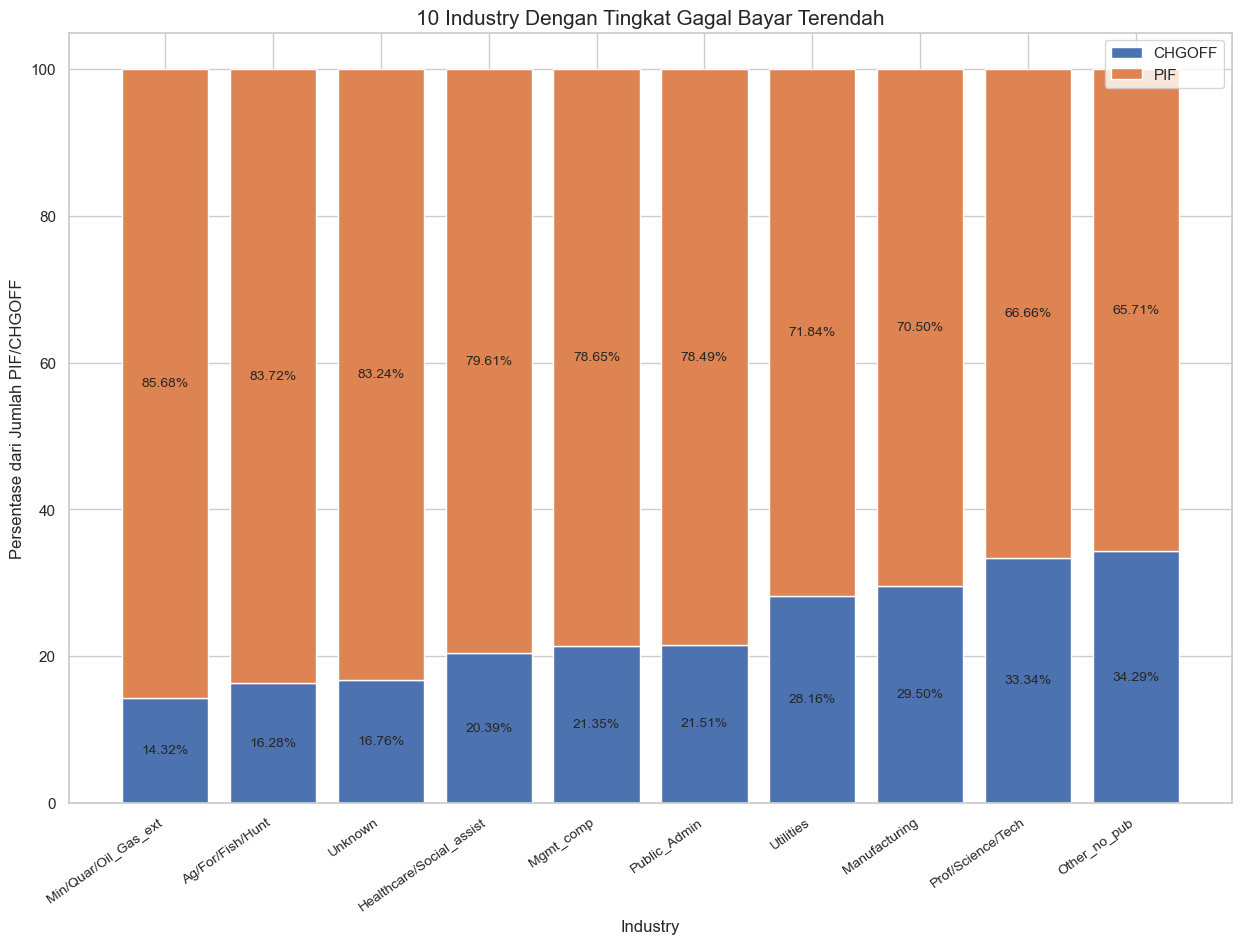

In [ ]:
import matplotlib.pyplot as plt

# Membuat fungsi stacked bar
def stacked(df, col, ax, stack_col='MIS_Status_int'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    # Menghitung persentase CHGOFF
    data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100

    # Mengambil 10 data dengan persentase CHGOFF terkecil
    top_10 = data.sort_values(by='CHGOFF_Percentage', ascending=True).head(10)

    # Plot bar CHGOFF di atas PIF dengan persentase
    ax.bar(top_10.index, (top_10[0] / (top_10[0] + top_10[1])) * 100, label='CHGOFF')

    # Plot bar PIF di bawah CHGOFF dengan persentase
    ax.bar(top_10.index, (top_10[1] / (top_10[0] + top_10[1])) * 100, label='PIF', bottom=(top_10[0] / (top_10[0] + top_10[1])) * 100)

    # Tambahkan label persentase CHGOFF dan PIF
    for index, row in top_10.iterrows():
        pif_percentage = (row[1] / (row[0] + row[1])) * 100
        chgoff_percentage = (row[0] / (row[0] + row[1])) * 100
        ax.text(index, chgoff_percentage / 2, f'{chgoff_percentage:.2f}%', ha='center', va='center', fontsize=10)
        ax.text(index, chgoff_percentage + pif_percentage / 2, f'{pif_percentage:.2f}%', ha='center', va='center', fontsize=10)

    # Mengatur label pada sumbu x
    ax.set_xticklabels(top_10.index, rotation=35, horizontalalignment='right', fontsize=10)

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(15, 10))

# Memanggil fungsi stacked
stacked(df=df, col='Industry', ax=ax)

# Menambahkan judul dan label pada grafik
ax.set_title('10 Industry Dengan Tingkat Gagal Bayar Terendah', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Persentase dari Jumlah PIF/CHGOFF')

# Menampilkan legenda
ax.legend()

# Menampilkan grafik
plt.show()

Industri dengan tingkat gagal bayar terendah ada pada Min/Quar/Oil_Gas_ext (14,32%), Ag/For/Fish/Hunt (16,28%), dan Unknown (16,76%)

## Stage 2

### Handle Missing Values

In [ ]:
#Cek nilai missing value

df.isnull().sum()

LoanNr_ChkDgt             0
Name                     11
City                      4
State                     1
Zip                       0
Bank                    175
BankState               176
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                36
LowDoc                  233
ChgOffDate           173173
DisbursementDate        487
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
MIS_Status_int            0
Industry                  0
dtype: int64

In [ ]:
# menggali info tipe data apa saja yang memiliki nilai missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258966 entries, 0 to 258965
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      258966 non-null  object 
 1   Name               258955 non-null  object 
 2   City               258962 non-null  object 
 3   State              258965 non-null  object 
 4   Zip                258966 non-null  object 
 5   Bank               258791 non-null  object 
 6   BankState          258790 non-null  object 
 7   NAICS              258966 non-null  object 
 8   ApprovalDate       258966 non-null  object 
 9   ApprovalFY         258966 non-null  object 
 10  Term               258966 non-null  int64  
 11  NoEmp              258966 non-null  int64  
 12  NewExist           258966 non-null  object 
 13  CreateJob          258966 non-null  int64  
 14  RetainedJob        258966 non-null  int64  
 15  FranchiseCode      258966 non-null  object 
 16  Ur

In [ ]:
# menghapus feature atau mengisi nilai missing value
df = df.drop(columns=["ChgOffDate"])

df["Name"].fillna("", inplace=True)
df["City"].fillna(df["City"].mode()[0], inplace=True)
df["State"].fillna(df["State"].mode()[0], inplace=True)
df["Bank"].fillna(df["Bank"].mode()[0], inplace=True)
df["BankState"].fillna(df["BankState"].mode()[0], inplace=True)
df["RevLineCr"].fillna(df["RevLineCr"].mode()[0], inplace=True)
df["LowDoc"].fillna(df["LowDoc"].mode()[0], inplace=True)
df["DisbursementDate"].fillna(df["DisbursementDate"].mode()[0], inplace=True)

df.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
MIS_Status_int       0
Industry             0
dtype: int64

- Feature yang memiliki missing values adalah kolom kategorikal sehingga handle missing values dilakukan dengan teknik imputasi yaitu mengisinya dengan modus.
- Namun, untuk feature ChgOffDate memiliki missing values yang sangat banyak karena feature tersebut akan berisi tanggal ketika nasabah dinyatakan gagal bayar. Tentu saja hal ini sepenuhnya telah dijelaskan pada kolom target yaitu MIS_Status sehingga feature ChgOffDate harus dihapus.

###Handle Invalid Data

In [ ]:
value_counts = df['RevLineCr'].value_counts()
print(value_counts)

N    112177
Y     87581
0     52193
T      7004
1         8
`         2
,         1
Name: RevLineCr, dtype: int64


Pada kolom RevLineCr, datanya akan dirapikan yaitu mengubah N menjadi No dan Y menjadi Yes. Kemudian, baris yang berisi selain N dan Y dihandle dengan mengubah 0 dan T menjadi No, 1 menjadi Yes, dan baris yang memiliki invalid data lainnya dihapus.


In [ ]:
value_counts = df['LowDoc'].value_counts()
print(value_counts)

N    240742
Y     17990
C       164
S        48
R        11
A        10
1         1
Name: LowDoc, dtype: int64


Pada kolom LowDoc, datanya akan dirapikan yaitu mengubah N menjadi No dan Y menjadi Yes. Kemudian, baris yang berisi selain N dan Y dihapus

In [ ]:
# Merapikan values
replacement_dict = {
    'N': 'No',
    'Y': 'Yes',
    '0': 'No',
    'T': 'No',
    '1': 'Yes'
}

df['RevLineCr'] = df['RevLineCr'].replace(replacement_dict)

# Menghapus nilai selain 'Yes' dan 'No'
df = df[df['RevLineCr'].isin(['Yes', 'No'])]

# Merapikan values
replacement_dict = {
    'N': 'No',
    'Y': 'Yes'
}

df['LowDoc'] = df['LowDoc'].replace(replacement_dict)

# Menghapus nilai selain 'Yes' dan 'No'
df = df[df['LowDoc'].isin(['Yes', 'No'])]

### Handle Duplicated Data

In [ ]:
# mengecek duplicate
df.duplicated().sum()

0

Tidak ada data duplikat.

### Handle Outliers

In [ ]:
# handiling outliers
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True]*len(df))
for col in ['Term', 'NoEmp', 'CreateJob', 'RetainedJob',
       'DisbursementGross', 'ChgOffPrinGr', 'GrAppv',
       'SBA_Appv']:
  z_scores = abs(stats.zscore(df[col]))
  filtered_entries = (z_scores < 3)

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 258729
Jumlah baris setelah memfilter outlier: 251585


Menggunakan Z-Score untuk mendeteksi dan menghapus outlier.

### Feature Transformation

Semua feature yang memiliki tipe data numeric dilakukan feature transformation menggunakan log transformation.

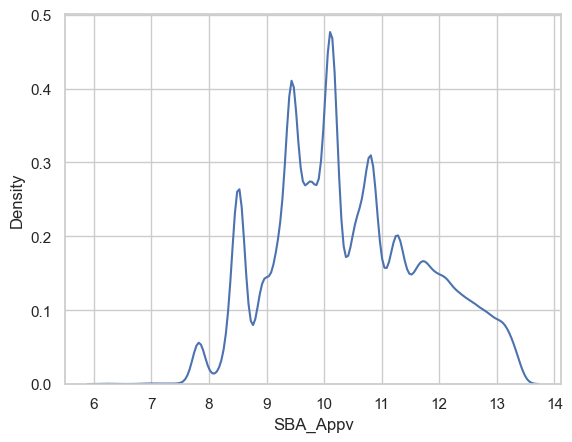

In [ ]:
# feature transformation menggunakan log
sns.kdeplot(np.log(df['SBA_Appv']))
df['log_SBA_Appv'] = np.log(df['SBA_Appv'])

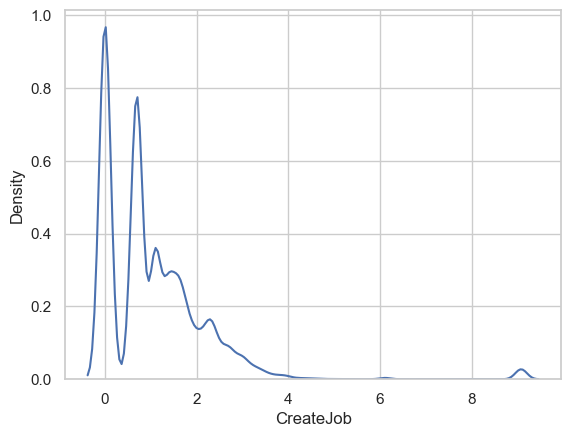

In [ ]:
sns.kdeplot(np.log(df['CreateJob']))
df['log_CreateJob'] = np.log(df['CreateJob'])

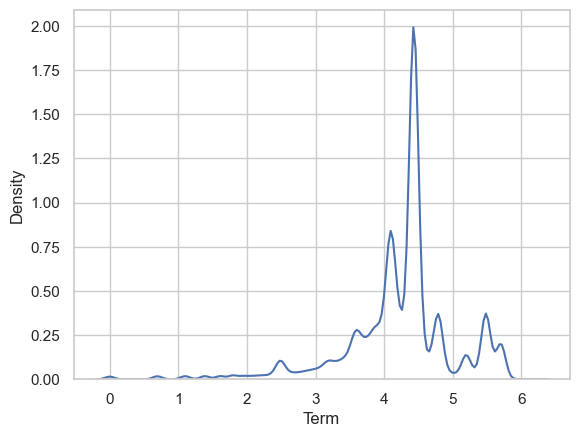

In [ ]:
sns.kdeplot(np.log(df['Term']))
df['log_Term'] = np.log(df['Term'])

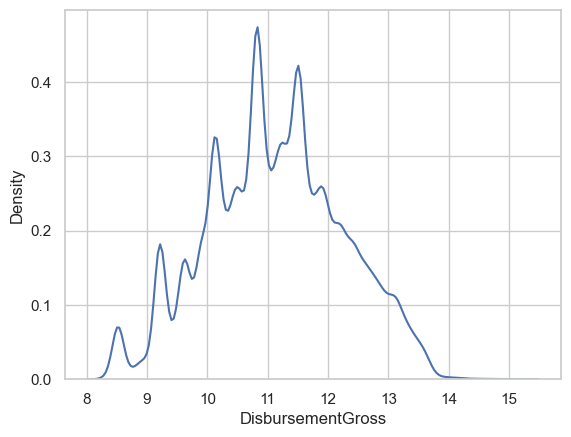

In [ ]:
sns.kdeplot(np.log(df['DisbursementGross']))
df['log_DisbursementGross'] = np.log(df['DisbursementGross'])

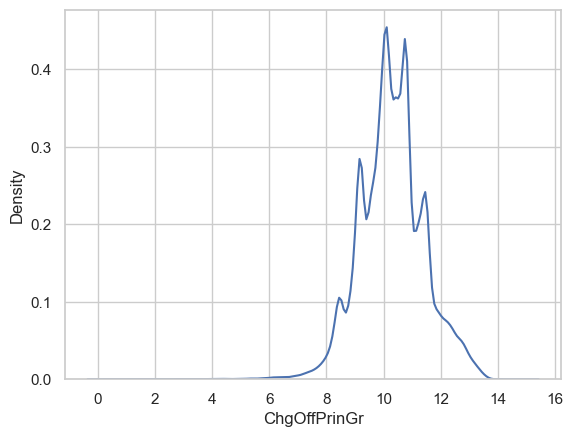

In [ ]:
sns.kdeplot(np.log(df['ChgOffPrinGr']))
df['log_ChgOffPrinGr'] = np.log(df['ChgOffPrinGr'])

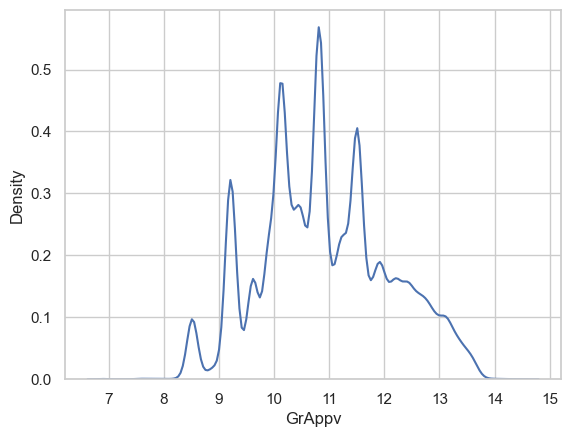

In [ ]:
sns.kdeplot(np.log(df['GrAppv']))
df['log_GrAppv'] = np.log(df['GrAppv'])

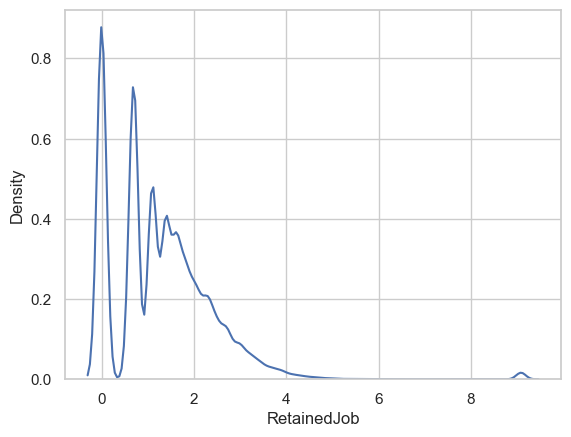

In [ ]:
sns.kdeplot(np.log(df['RetainedJob']))
df['log_RetainedJob'] = np.log(df['RetainedJob'])

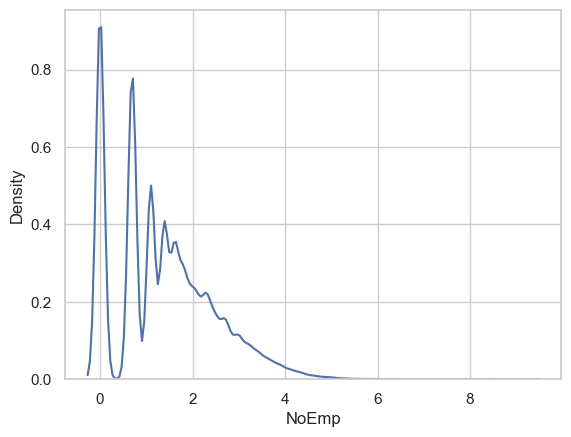

In [ ]:
sns.kdeplot(np.log(df['NoEmp']))
df['log_NoEmp'] = np.log(df['NoEmp'])

Beberapa feature yang memiliki distribusi normal setelah dilakukan feature transformation, yaitu SBA_Appv, DisbursementGross, ChgOffPrinGr, dan GrAppv.

### Feature Extraction

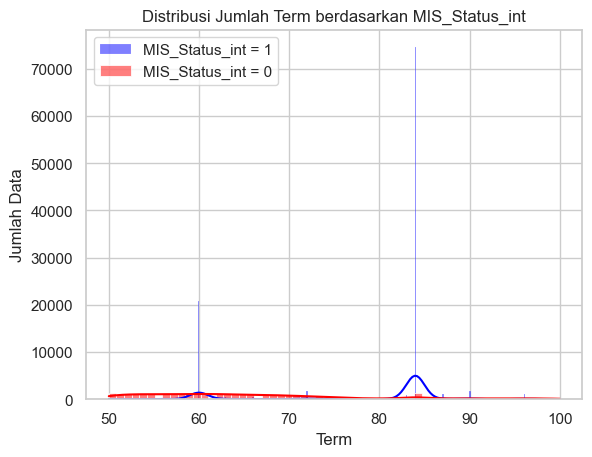

In [ ]:
# membuat feature baru, feature term_category
check = df[(df['Term'] >= 50) & (df['Term'] <= 100)]

mis_status_1 = check[df['MIS_Status_int'] == 1]['Term']
mis_status_0 = check[df['MIS_Status_int'] == 0]['Term']

sns.histplot(mis_status_1, kde=True, label='MIS_Status_int = 1', color='blue')
sns.histplot(mis_status_0, kde=True, label='MIS_Status_int = 0', color='red')

plt.xlabel('Term')
plt.ylabel('Jumlah Data')
plt.legend()
plt.title('Distribusi Jumlah Term berdasarkan MIS_Status_int')

plt.show()

In [ ]:
def category(Term):
    if Term < 58:
        return "low"
    elif Term < 62:
        return "medium"
    elif Term < 82:
        return "high"
    else:
        return "very high"

df["term_category"] = df["Term"].apply(category)
#df = df.drop(columns=["term_category"])

In [ ]:
# membuat feature baru, feature Job_Stability
df['Job_Stability'] = df.apply(lambda row: 1 if row['RetainedJob'] > row['CreateJob'] else 0, axis=1)

In [ ]:
# membuat feature baru, feature Company_Size
df['CompanySize'] = df['NoEmp'].apply(lambda x: 0 if x < 25 else (1 if x < 100 else 2))
#df.drop(columns=['NoEmp'], inplace=True)

In [ ]:
# membuat feature baru, feature Recession

# Ubah kolom "DisbursementDate" menjadi tipe data datetime
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])

# Tentukan tanggal awal dan akhir dari Resesi Besar
start_date = pd.to_datetime('01-12-2007')
end_date = pd.to_datetime('30-06-2009')

# Atur nilai "Recession" menjadi 1 jika ApprovalDate berada dalam rentang waktu resesi
df['Recession'] = df['DisbursementDate'].apply(lambda x: 1 if start_date <= x <= end_date else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251585 entries, 0 to 258965
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   LoanNr_ChkDgt          251585 non-null  object        
 1   Name                   251585 non-null  object        
 2   City                   251585 non-null  object        
 3   State                  251585 non-null  object        
 4   Zip                    251585 non-null  object        
 5   Bank                   251585 non-null  object        
 6   BankState              251585 non-null  object        
 7   NAICS                  251585 non-null  object        
 8   ApprovalDate           251585 non-null  object        
 9   ApprovalFY             251585 non-null  object        
 10  Term                   251585 non-null  int64         
 11  NoEmp                  251585 non-null  int64         
 12  NewExist               251585 non-null  obje

### Feature Encoding

Melakukan feature encoding terhadap kolom categorical

In [ ]:
# membuat feature baru, feature Franchise_Code
df['Franchise'] = df['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)
df.drop(columns=['FranchiseCode'], inplace=True)

In [ ]:
df["term_category_encoded"] = df["term_category"].replace({
    "low": 0,
    "medium": 1,
    "high": 2,
    "very high": 3
})

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List kolom kategorikal yang ingin di-encode
categorical_columns = ['RevLineCr', 'LowDoc', 'Industry', 'NewExist']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Iterasi melalui setiap kolom kategorikal dan lakukan encoding
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])


###Feature Scalling

Menerapkan standardisasi terhadap kolom numerik yang telah dilakukan log transformation.

In [ ]:
# feature scalling dengan StandarScaler
from sklearn.preprocessing import StandardScaler
df['log_GrAppv_std'] = StandardScaler().fit_transform(df['log_GrAppv'].values.reshape(len(df), 1))

###Feature Selection

In [ ]:
num = {'Term', 'NoEmp', 'CreateJob', 'RetainedJob',
       'DisbursementGross', 'ChgOffPrinGr', 'GrAppv',
       'SBA_Appv', 'MIS_Status_int', 'log_CreateJob', 'log_Term', 'log_DisbursementGross',
      'log_ChgOffPrinGr', 'log_GrAppv', 'log_SBA_Appv', 'log_RetainedJob', 'log_NoEmp', 'log_GrAppv_std'}

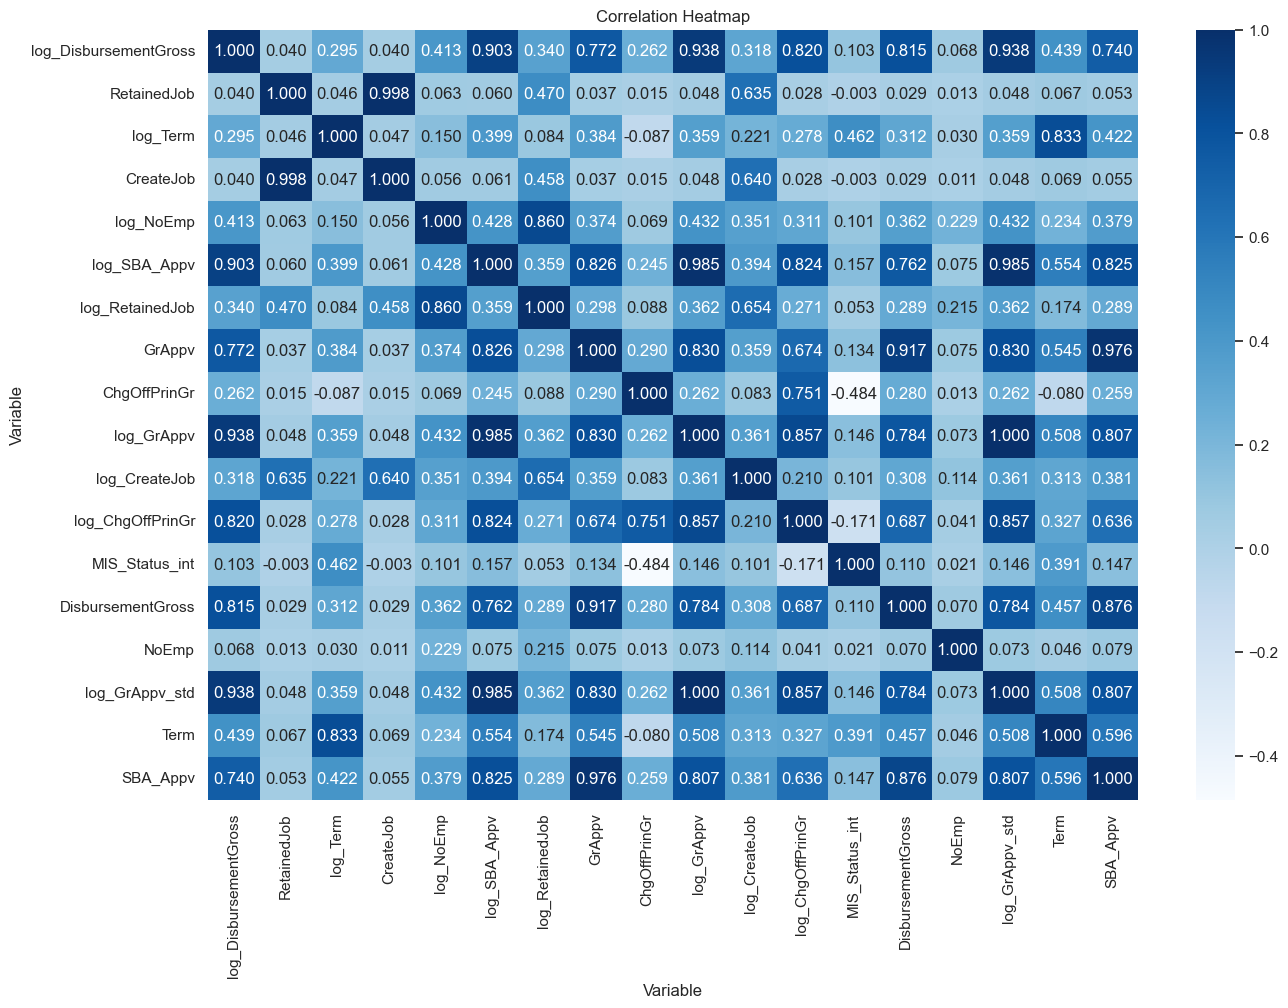

In [ ]:
num_corr = df[num].corr()

plt.figure(figsize=(15,10))
sns.heatmap(num_corr, cmap='Blues', annot = True, fmt='.3f')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.title('Correlation Heatmap')
plt.show()

Fitur GrAppv memiliki korelasi yang tinggi dengan DisbursementGross dan SBA_Appv (terindikasi redundan) sehingga kami hanya memilih feature GrAppv.

In [ ]:
from scipy.stats import ttest_ind

# Mengambil data untuk dua kelompok
group1 = df[df['MIS_Status_int'] == 0]['log_GrAppv_std']
group2 = df[df['MIS_Status_int'] == 1]['log_GrAppv_std']

# Melakukan t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Menampilkan hasil
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Membuat keputusan berdasarkan nilai p-value
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara kedua kelompok.")
else:
    print("Tidak terdapat perbedaan signifikan antara kedua kelompok.")

T-Statistic: -74.21588051562921
P-Value: 0.0
Terdapat perbedaan signifikan antara kedua kelompok.


Feature GrAppv yang kami pilih adalah yang sudah dilakukan log transformation dan standardisasi.  Dari hasil ttest feature tersebut memiliki pengaruh statistik signifikan terhadap variabel target sehingga feature ini akan menjadi salah satu input model machine learning.

In [ ]:
from scipy.stats import chi2_contingency

# Menentukan variabel-variabel yang ingin diuji korelasinya
categorical_features = ['NewExist_encoded', 'RevLineCr_encoded', 'LowDoc_encoded','MIS_Status_int',
                        'Industry_encoded', 'Job_Stability', 'CompanySize', 'Franchise', 'Recession', 'term_category_encoded']

# Inisialisasi DataFrame untuk menyimpan hasil uji chi-square
chi2_results = pd.DataFrame(index=categorical_features, columns=categorical_features)
p_values = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Melakukan uji chi-square untuk setiap pasangan variabel
for feature1 in categorical_features:
    for feature2 in categorical_features:
        # Membuat tabel kontingensi
        contingency_table = pd.crosstab(df[feature1], df[feature2])

        # Melakukan uji chi-square
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Menyimpan nilai p-value dan statistik Chi-Square dalam DataFrame
        chi2_results.at[feature1, feature2] = chi2
        p_values.at[feature1, feature2] = p

# Menampilkan hasil uji chi-square
print("Hasil Uji Chi-Square (Statistik Chi-Square):")
print(chi2_results)

# Menampilkan nilai p-value
print("\nNilai P-Value:")
print(p_values)

Hasil Uji Chi-Square (Statistik Chi-Square):
                      NewExist_encoded RevLineCr_encoded LowDoc_encoded  \
NewExist_encoded             503170.00            850.97        3587.39   
RevLineCr_encoded               850.97         251580.59       10306.82   
LowDoc_encoded                 3587.39          10306.82      251569.94   
MIS_Status_int                  277.85           1001.09        4386.95   
Industry_encoded               4133.19          26790.71       17672.16   
Job_Stability                  3491.90          30994.68       20891.00   
CompanySize                    2407.46           2190.97         488.83   
Franchise                      2466.09           2245.80         214.48   
Recession                       112.57           7189.67        6657.40   
term_category_encoded           720.43           6660.77        4430.57   

                      MIS_Status_int Industry_encoded Job_Stability  \
NewExist_encoded              277.85          4133.19     

Terdapat perbedaan signifikan antara semua kolom categorical terhadap kolom MIS_Status_int yang berarti semua feature categorical yang ada memiliki pengaruh statistik signifikan terhadap variabel target. Oleh karena itu, kami juga memilih semua feature categorical untuk pada model machine learning kami.

In [ ]:
# Ambil beberapa fitur (kolom) dari DataFrame yang sudah ada
selected_features = df[['NewExist_encoded', 'RevLineCr_encoded', 'LowDoc_encoded',
                        'Industry_encoded', 'Job_Stability', 'CompanySize', 'Franchise',
                        'Recession', 'term_category_encoded', 'MIS_Status_int', 'log_GrAppv_std']]

#selected_features = df[['NewExist', 'Franchise', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry', 'term_category',
                        #'Job_Stability', 'CompanySize','Recession', 'State_Category', 'MIS_Status_int']]
selected_features

# Buat DataFrame baru dengan fitur yang telah dipilih
#df = pd.DataFrame(selected_features)

,NewExist_encoded,RevLineCr_encoded,LowDoc_encoded,Industry_encoded,Job_Stability,CompanySize,Franchise,Recession,term_category_encoded,MIS_Status_int,log_GrAppv_std
0,2,0,0,18,0,1,0,0,0,0,2.05
1,1,0,1,18,0,0,0,0,3,0,-0.14
2,2,1,0,18,0,0,0,0,3,0,1.11
4,1,0,0,3,0,0,0,0,0,0,-0.68
5,1,0,0,18,0,0,0,0,0,0,-0.88
...,...,...,...,...,...,...,...,...,...,...,...
258961,2,0,0,16,0,0,0,1,0,1,-1.47
258962,1,0,0,16,0,0,0,1,3,1,1.73
258963,1,0,0,1,1,0,0,1,3,1,1.90
258964,1,0,0,16,1,0,0,1,3,1,1.38


### Handle Class Imbalance

In [ ]:
# melihat jumlah data yang bernilai 1 dan 0 di feature target MIS_Status_int
print(selected_features['MIS_Status_int'].value_counts())

1    169059
0     82526
Name: MIS_Status_int, dtype: int64


In [ ]:
# memisahkan feature target
X = selected_features.drop(columns=['MIS_Status_int'])
y = selected_features['MIS_Status_int']

In [ ]:
# melakukan split data training dan data testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# menggunakan oversampling data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

0    135210
1    135210
Name: MIS_Status_int, dtype: int64


## Stage 3

### Modeling

#### Data Train & Test

In [ ]:
print("Total data dalam X_train:", X_train.shape[0])
print("Total data dalam X_test:", X_test.shape[0])
print("Total data dalam y_train:", y_train.shape[0])
print("Total data dalam y_test:", y_test.shape[0])
print("Total data dalam X_resampled:", X_resampled.shape[0])
print("Total data dalam y_resampled:", y_resampled.shape[0])

Total data dalam X_train: 201268
Total data dalam X_test: 50317
Total data dalam y_train: 201268
Total data dalam y_test: 50317
Total data dalam X_resampled: 270420
Total data dalam y_resampled: 270420


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_resampled, y_resampled) # fit model regression dari data train

LogisticRegression()

In [ ]:
y_predicted = logreg.predict(X_test) # prediksi data test
y_pred = logreg.predict(X_resampled)
from sklearn.metrics import accuracy_score, precision_score
train_precision_logreg = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_logreg = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_logreg = round(precision_score(y_test, y_predicted), 2)
test_accuracy_logreg = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_logreg)
print(f'Train Accuracy: ', train_accuracy_logreg)
print(f'Test Precision: ', test_precision_logreg)
print(f'Test Accuracy: ', test_accuracy_logreg)

Train Precision:  0.79
Train Accuracy:  0.8
Test Precision:  0.88
Test Accuracy:  0.8


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='precision')
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Model: LogisticRegression(C=10)


In [ ]:
best_logreg = LogisticRegression(C=10, penalty='l2')  # Gantilah dengan parameter terbaik dari hasil Grid Search

# Fit model pada data pelatihan
best_logreg.fit(X_resampled, y_resampled)

# Lakukan prediksi pada data test
y_predicted = best_logreg.predict(X_test)
y_pred = best_logreg.predict(X_resampled)

from sklearn.metrics import accuracy_score, precision_score
train_precision_bestlogreg = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_bestlogreg = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_bestlogreg = round(precision_score(y_test, y_predicted), 2)
test_accuracy_bestlogreg = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_bestlogreg)
print(f'Train Accuracy: ', train_accuracy_bestlogreg)
print(f'Test Precision: ', test_precision_bestlogreg)
print(f'Test Accuracy: ', test_accuracy_bestlogreg)

Train Precision:  0.79
Train Accuracy:  0.8
Test Precision:  0.88
Test Accuracy:  0.8


####  K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_resampled, y_resampled) # fit model KNN dari data train


KNeighborsClassifier()

In [ ]:
# Lakukan prediksi pada data test
y_predicted = knn.predict(X_test)
y_pred = knn.predict(X_resampled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_precision_knn = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_knn = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_knn = round(precision_score(y_test, y_predicted), 2)
test_accuracy_knn = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_knn)
print(f'Train Accuracy: ', train_accuracy_knn)
print(f'Test Precision: ', test_precision_knn)
print(f'Test Accuracy: ', test_accuracy_knn)

Train Precision:  0.87
Train Accuracy:  0.88
Test Precision:  0.9
Test Accuracy:  0.85


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisi hyperparameter grid yang akan diuji
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Coba beberapa nilai untuk jumlah tetangga (n_neighbors)
    'weights': ['uniform', 'distance'],  # Coba jenis bobot yang berbeda
    'p': [1, 2]  # Coba jarak Manhattan (p=1) dan jarak Euclidean (p=2)
}

# Inisiasi objek Grid Search
grid_search = GridSearchCV(knn, param_grid, scoring='precision')

# Melakukan pencarian grid pada data pelatihan
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Model: KNeighborsClassifier(n_neighbors=9)


In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform')  # Gantilah dengan parameter terbaik dari hasil Grid Search

# Fit model pada data pelatihan
best_knn.fit(X_resampled, y_resampled)

# Lakukan prediksi pada data test
y_predicted = best_knn.predict(X_test)
y_pred = best_knn.predict(X_resampled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_precision_bestknn = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_bestknn = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_bestknn = round(precision_score(y_test, y_predicted), 2)
test_accuracy_bestknn = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_bestknn)
print(f'Train Accuracy: ', train_accuracy_bestknn)
print(f'Test Precision: ', test_precision_bestknn)
print(f'Test Accuracy: ', test_accuracy_bestknn)

Train Precision:  0.87
Train Accuracy:  0.88
Test Precision:  0.91
Test Accuracy:  0.86


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_resampled, y_resampled) # fit model decision tree dari data train

DecisionTreeClassifier()

In [ ]:
# Lakukan prediksi pada data test
y_predicted = dt.predict(X_test)
y_pred = dt.predict(X_resampled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_precision_dt = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_dt = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_dt = round(precision_score(y_test, y_predicted), 2)
test_accuracy_dt = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_dt)
print(f'Train Accuracy: ', train_accuracy_dt)
print(f'Test Precision: ', test_precision_dt)
print(f'Test Accuracy: ', test_accuracy_dt)

Train Precision:  0.94
Train Accuracy:  0.93
Test Precision:  0.91
Test Accuracy:  0.83


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],  # Coba dua kriteria impurity berbeda
    'max_depth': [None, 10, 20, 30],  # Coba beberapa nilai kedalaman maksimum
    'min_samples_split': [2, 5, 10],  # Coba beberapa nilai minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Coba beberapa nilai minimum sampel per daun
}

# Inisiasi objek Grid Search
grid_search = GridSearchCV(dt, param_grid, scoring='precision')

# Melakukan pencarian grid pada data pelatihan
grid_search.fit(X_resampled, y_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Model: DecisionTreeClassifier(min_samples_leaf=2)


In [ ]:
best_dt = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_leaf=2, min_samples_split=2)  # Gantilah dengan parameter terbaik dari hasil Grid Search

# Fit model pada data pelatihan
best_dt.fit(X_resampled, y_resampled)

# Lakukan prediksi pada data test
y_predicted = best_dt.predict(X_test)
y_pred = best_dt.predict(X_resampled)

# Evaluasi model dengan metrik yang sesuai
from sklearn.metrics import accuracy_score, precision_score
train_precision_bestdt = round(precision_score(y_resampled, y_pred), 2)
train_accuracy_bestdt = round(accuracy_score(y_resampled, y_pred), 2)
test_precision_bestdt = round(precision_score(y_test, y_predicted), 2)
test_accuracy_bestdt = round(accuracy_score(y_test, y_predicted), 2)

print(f'Train Precision: ', train_precision_bestdt)
print(f'Train Accuracy: ', train_accuracy_bestdt)
print(f'Test Precision: ', test_precision_bestdt)
print(f'Test Accuracy: ', test_accuracy_bestdt)

Train Precision:  0.93
Train Accuracy:  0.91
Test Precision:  0.91
Test Accuracy:  0.83


###Tabel Evaluasi Model

In [ ]:
#create the table of train and test score model
table1 = {'Model': ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree'],
                 'Train Precision': [train_precision_logreg, train_precision_knn, train_precision_dt],
                 'Test Precision' : [test_precision_logreg, test_precision_knn, test_precision_dt],
                 'Train Accuracy': [train_accuracy_logreg, train_accuracy_knn, train_accuracy_dt],
                 'Test Accuracy' : [test_accuracy_logreg, test_accuracy_knn, test_accuracy_dt]}
before_tuning = pd.DataFrame(table1)
before_tuning

,Model,Train Precision,Test Precision,Train Accuracy,Test Accuracy
0,Logistic Regression,0.79,0.88,0.80,0.80
1,K-Nearest Neighbor,0.87,0.90,0.88,0.85
2,Decision Tree,0.94,0.91,0.93,0.83


In [ ]:
table2 = {'Model': ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree'],
                 'Train Precision': [train_precision_bestlogreg, train_precision_bestknn, train_precision_bestdt],
                 'Test Precision' : [test_precision_bestlogreg, test_precision_bestknn, test_precision_bestdt],
                 'Train Accuracy': [train_accuracy_bestlogreg, train_accuracy_bestknn, train_accuracy_bestdt],
                 'Test Accuracy' : [test_accuracy_bestlogreg, test_accuracy_bestknn, test_accuracy_bestdt]}
after_tuning = pd.DataFrame(table2)
after_tuning

,Model,Train Precision,Test Precision,Train Accuracy,Test Accuracy
0,Logistic Regression,0.79,0.88,0.80,0.80
1,K-Nearest Neighbor,0.87,0.91,0.88,0.86
2,Decision Tree,0.93,0.91,0.91,0.83


Dari hasil tersebut, kami memilih model Decision Tree yang sudah dilakukan hyperparameter tuning karena memiliki score data test dan data train yang lebih optimal dibandingkan model lainnya

###Feature Importance

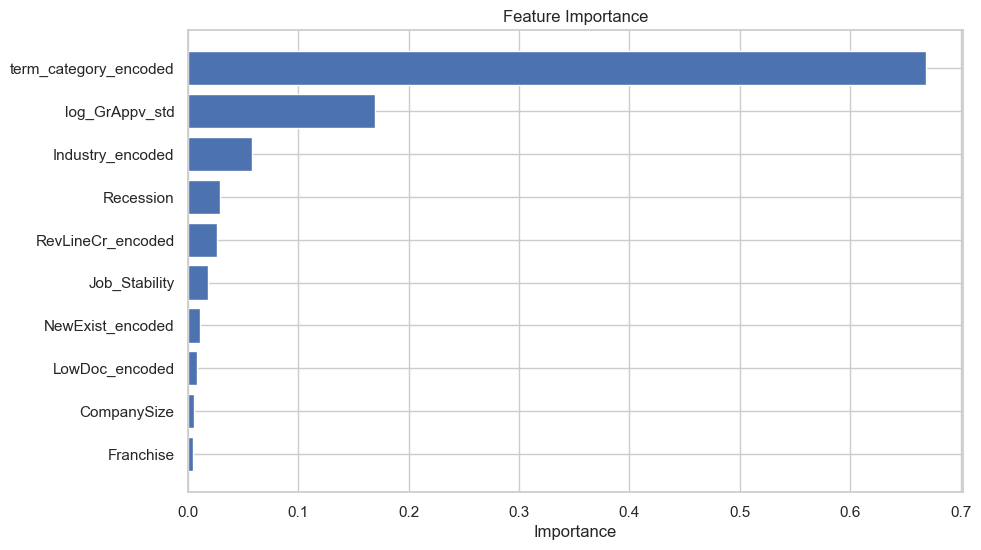

In [ ]:
# Mendapatkan feature importance dari model
feature_importance = best_dt.feature_importances_

# Membuat DataFrame untuk memudahkan plotting
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Mengurutkan DataFrame berdasarkan feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

3 feature paling penting: Term, GrAppv, dan Industry

#Stage 4 - Business Simulation

Simulasi bisnis menggunakan data yang tidak digunakan dalam training dan test. Sebelum dilakukan simulasi, dilakukan proses pre-processing seperti drop kolom yang tidak digunakan, pengecekan data duplikat, drop missing values, dan transformasi fitur. Selain itu juga dilakukan feature extraction, scalling & encoding seperti yang dilakukan pada data saat modelling.

In [ ]:
# Persiapkan data input
df2 = pd.read_csv('SBAnational_Test.csv', sep = ";")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381006 entries, 0 to 381005
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      381006 non-null  int64  
 1   Name               381005 non-null  object 
 2   City               380944 non-null  object 
 3   State              380939 non-null  object 
 4   Zip                380942 non-null  float64
 5   Bank               380493 non-null  object 
 6   BankState          380490 non-null  object 
 7   NAICS              380942 non-null  float64
 8   ApprovalDate       380942 non-null  object 
 9   ApprovalFY         380942 non-null  object 
 10  Term               380942 non-null  float64
 11  NoEmp              380942 non-null  float64
 12  NewExist           380941 non-null  float64
 13  CreateJob          380942 non-null  float64
 14  RetainedJob        380942 non-null  float64
 15  FranchiseCode      380942 non-null  float64
 16  Ur

In [ ]:
# mengecek duplicate
df2.duplicated().sum()

0

In [ ]:
# Menghapus satu atau beberapa kolom
kolom_yang_akan_dihapus = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
                          'BankState', 'ApprovalDate', 'ApprovalFY', 'ChgOffDate',
                           'DisbursementGross', 'BalanceGross', 'SBA_Appv', 'UrbanRural']
df2.drop(columns=kolom_yang_akan_dihapus, inplace=True)

In [ ]:
#Cek nilai missing value

df2.isna().sum()

NAICS                 64
Term                  64
NoEmp                 64
NewExist              65
CreateJob             64
RetainedJob           64
FranchiseCode         64
RevLineCr           4197
LowDoc               240
DisbursementDate     938
MIS_Status           703
ChgOffPrinGr          64
GrAppv                64
dtype: int64

In [ ]:
df2 = df2.dropna()

In [ ]:
# Kolom yang akan diubah menjadi tipe data 'object'
cols_to_convert = ['NewExist','RevLineCr', 'FranchiseCode']

# Ubah tipe data kolom menjadi 'object'
df2[cols_to_convert] = df2[cols_to_convert].astype('object')

In [ ]:
# Kolom yang akan diubah menjadi tipe data 'float'
cols_to_convert = ['ChgOffPrinGr', 'GrAppv']

# Ubah tipe data kolom menjadi 'float'
df2[cols_to_convert] = df2[cols_to_convert].replace('[\$,]', '', regex=True).astype(float)

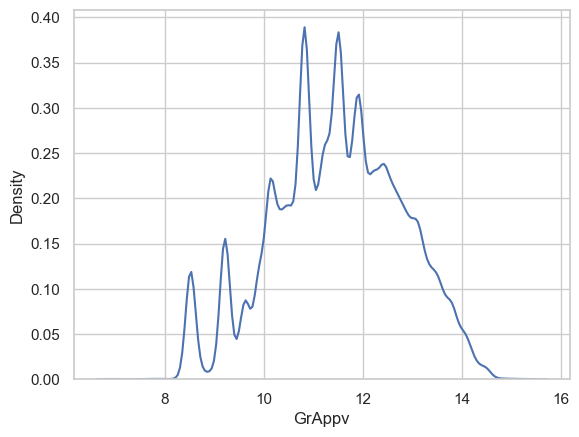

In [ ]:
# feature transformation menggunakan log
sns.kdeplot(np.log(df2['GrAppv']))
df2['log_GrAppv'] = np.log(df2['GrAppv'])

In [ ]:
df2['MIS_Status_int'] = df2['MIS_Status'].replace('P I F', 1).replace('CHGOFF', 0)

In [ ]:
df2['Industry'] = df2['NAICS'].astype(str).apply(lambda x: x[:2])
df2['Industry'] = df2['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

df2['Industry'].fillna('Unknown', inplace=True)

In [ ]:
def category(Term):
    if Term < 58:
        return "low"
    elif Term < 62:
        return "medium"
    elif Term < 82:
        return "high"
    else:
        return "very high"

df2["term_category"] = df2["Term"].apply(category)
df2["term_category_encoded"] = df2["term_category"].replace({
    "low": 0,
    "medium": 1,
    "high": 2,
    "very high": 3
})
#df2 = df2.drop(columns=["term_category"])

In [ ]:
# membuat feature baru, feature Job_Stability
df2['Job_Stability'] = df2.apply(lambda row: 1 if row['RetainedJob'] > row['CreateJob'] else 0, axis=1)

In [ ]:
# membuat feature baru, feature Franchise_Code
df2['Franchise'] = df2['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)
df2.drop(columns=['FranchiseCode'], inplace=True)

In [ ]:
# membuat feature baru, feature Company_Size
df2['CompanySize'] = df2['NoEmp'].apply(lambda x: 0 if x < 25 else (1 if x < 100 else 2))
#df.drop(columns=['NoEmp'], inplace=True)

In [ ]:
# membuat feature baru, feature Recession

# Ubah kolom "DisbursementDate" menjadi tipe data datetime
df2['DisbursementDate'] = pd.to_datetime(df2['DisbursementDate'])

# Tentukan tanggal awal dan akhir dari Resesi Besar
start_date = pd.to_datetime('01-12-2007')
end_date = pd.to_datetime('30-06-2009')

# Atur nilai "Recession" menjadi 1 jika ApprovalDate berada dalam rentang waktu resesi
df2['Recession'] = df2['DisbursementDate'].apply(lambda x: 1 if start_date <= x <= end_date else 0)

In [ ]:
# feature scalling dengan StandarScaler
from sklearn.preprocessing import StandardScaler

df2['log_GrAppv_std'] = StandardScaler().fit_transform(df2['log_GrAppv'].values.reshape(len(df2), 1))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List kolom kategorikal yang ingin di-encode
categorical_columns = ['RevLineCr', 'LowDoc', 'Industry', 'NewExist']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Iterasi melalui setiap kolom kategorikal dan lakukan encoding
for column in categorical_columns:
    df2[column + '_encoded'] = label_encoder.fit_transform(df2[column])

In [ ]:
# memasukkan ke variable df untuk feature-feature yang sudah dipilih
input_data = df2[['NewExist_encoded', 'RevLineCr_encoded', 'LowDoc_encoded',
                        'Industry_encoded', 'Job_Stability', 'CompanySize', 'Franchise',
                        'Recession', 'term_category_encoded', 'log_GrAppv_std']]

In [ ]:
input_data

,NewExist_encoded,RevLineCr_encoded,LowDoc_encoded,Industry_encoded,Job_Stability,CompanySize,Franchise,Recession,term_category_encoded,log_GrAppv_std
0,2,9,3,12,0,0,0,0,1,-1.11
1,1,2,3,1,1,0,0,0,3,-0.25
2,2,2,3,7,0,0,0,0,3,0.84
3,1,2,3,16,0,0,0,0,3,2.25
4,2,9,3,0,0,0,0,0,3,0.34
...,...,...,...,...,...,...,...,...,...,...
381001,1,2,3,16,0,0,0,0,1,-0.25
381002,1,13,3,16,0,0,0,0,1,-0.10
381003,1,9,3,9,0,1,0,0,3,0.87
381004,1,9,6,18,0,0,0,0,1,-0.20


In [ ]:
# Lakukan prediksi
predictions = best_dt.predict(input_data)

# Tampilkan hasil prediksi
print(predictions)


[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, classification_report

y_true = df2['MIS_Status_int']
y_pred = best_dt.predict(input_data)

# Menghitung presisi
precision = precision_score(y_true, y_pred)
print(f'Precision: {precision:.2f}')

# Menghitung akurasi
accuracy = accuracy_score(y_true, y_pred)
print(f'Akurasi: {accuracy:.2f}')

# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_true, y_pred)
print('Laporan Klasifikasi:\n', classification_rep)


Precision: 0.94
Akurasi: 0.81
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.32      0.61      0.42     41921
           1       0.94      0.83      0.89    333306

    accuracy                           0.81    375227
   macro avg       0.63      0.72      0.65    375227
weighted avg       0.87      0.81      0.83    375227



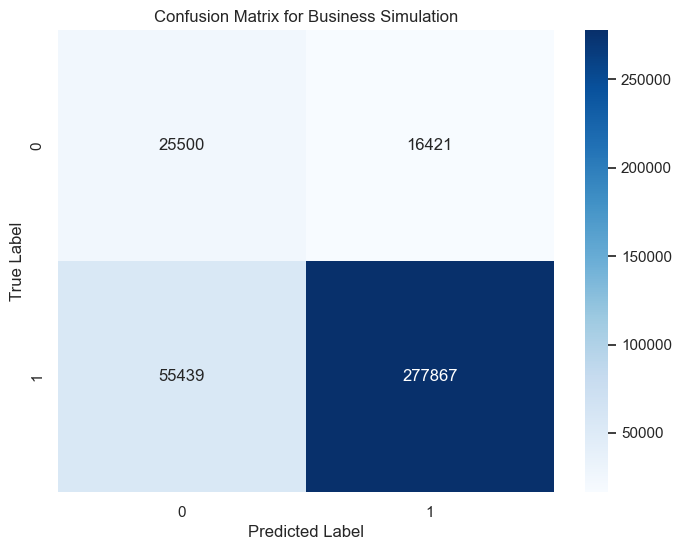

In [ ]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix for Business Simulation")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Menghitung persentase gagal bayar
persentase_gagal_bayar_sebelum_modelling = (df2[df2['MIS_Status_int'] == 0].shape[0] / len(df2)) * 100

print(f'Persentase Gagal Bayar (Sebelum Modelling): {persentase_gagal_bayar_sebelum_modelling:.2f}%')

Persentase Gagal Bayar (Sebelum Modelling): 11.17%


In [ ]:
# Menghitung persentase false positives
false_positives = len(y_pred[(y_pred == 1) & (y_true == 0)])

# Menghitung total positive predictions
total_positives = len(y_pred[y_pred == 1])

# Menghitung persentase false positives terhadap total positive predictions
persentase_gagal_bayar_setelah_modelling = (false_positives / total_positives) * 100

print(f'Persentase Gagal Bayar (Setelah Modelling): {persentase_gagal_bayar_setelah_modelling:.2f}%')

Persentase Gagal Bayar (Setelah Modelling): 5.58%


In [ ]:
# Menghitung total chgoffprinGr
nominal_gagal_bayar_sebelum_modelling = df2['ChgOffPrinGr'].sum()

print(f'Nominal Gagal Bayar (Sebelum Modelling): {nominal_gagal_bayar_sebelum_modelling}')

Nominal Gagal Bayar (Sebelum Modelling): 3376815398.0


In [ ]:
df2['predicted_status'] = y_pred
# Pilih baris yang diprediksi lunas padahal gagal bayar
gagal_bayar = df2[(df2['predicted_status'] == 1) & (df2['MIS_Status_int'] == 0)]

# Hitung total ChgOffPrinGr pada baris-baris tersebut
nominal_gagal_bayar_setelah_modelling = gagal_bayar['ChgOffPrinGr'].sum()
print(f'Nominal Gagal Bayar (Setelah Modelling): {nominal_gagal_bayar_setelah_modelling}')

Nominal Gagal Bayar (Setelah Modelling): 1800216453.0


In [ ]:
persentase = ((nominal_gagal_bayar_sebelum_modelling - nominal_gagal_bayar_setelah_modelling) / nominal_gagal_bayar_sebelum_modelling) * 100
persentase

46.68892904047341

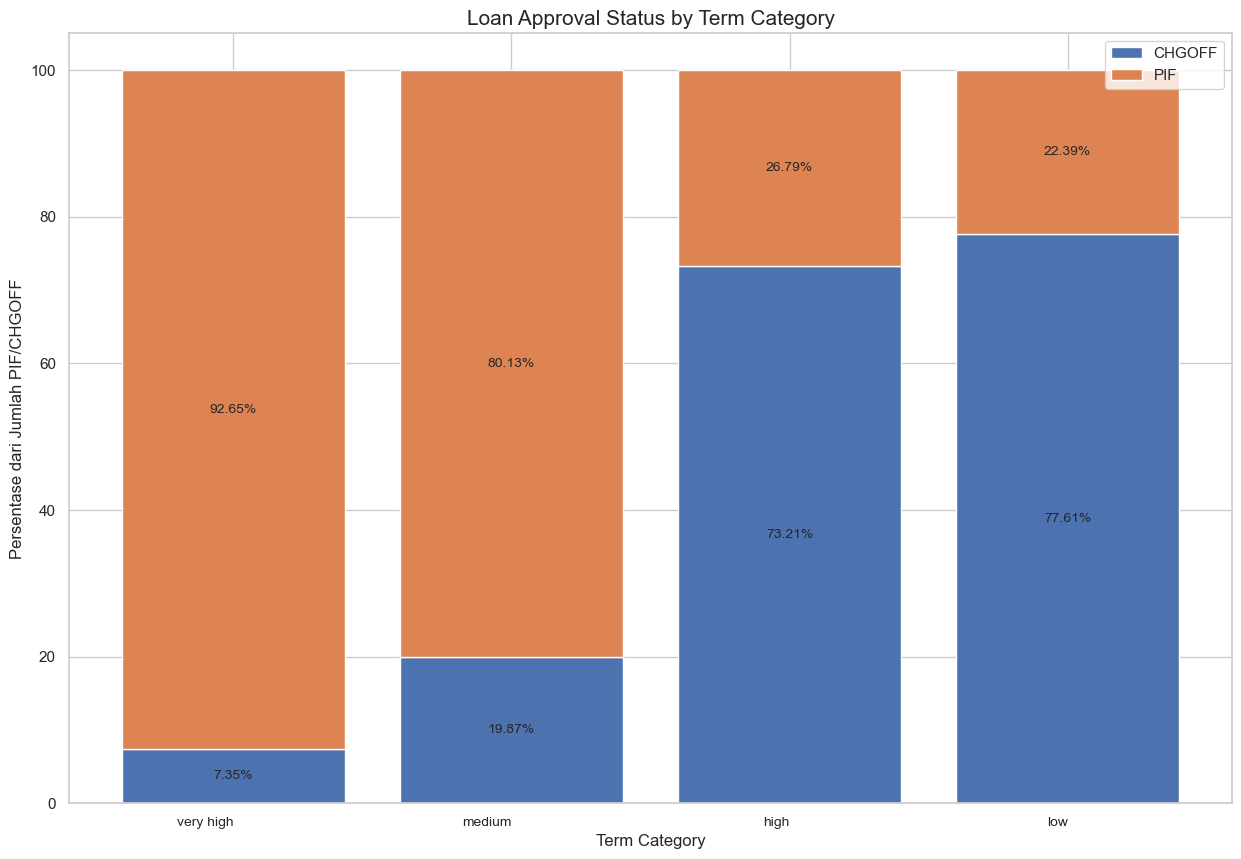

In [ ]:
import matplotlib.pyplot as plt

# Membuat fungsi stacked bar
def stacked_term_status(df, col, ax, stack_col='MIS_Status_int'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    # Menghitung persentase CHGOFF dan PIF
    data['CHGOFF_Percentage'] = (data[0] / (data[0] + data[1])) * 100
    data['PIF_Percentage'] = (data[1] / (data[0] + data[1])) * 100

    # Mengurutkan berdasarkan persentase PIF terbesar
    data = data.sort_values(by='PIF_Percentage', ascending=False)

    # Plot bar CHGOFF di bawah PIF dengan persentase
    ax.bar(data.index, (data[0] / (data[0] + data[1])) * 100, label='CHGOFF')

    # Plot bar PIF di atas CHGOFF dengan persentase
    ax.bar(data.index, (data[1] / (data[0] + data[1])) * 100, label='PIF', bottom=(data[0] / (data[0] + data[1])) * 100)

    # Tambahkan label persentase CHGOFF dan PIF
    for index, row in data.iterrows():
        pif_percentage = row['PIF_Percentage']
        chgoff_percentage = row['CHGOFF_Percentage']
        # Tampilkan label persentase di tengah
        ax.text(index, chgoff_percentage / 2, f'{chgoff_percentage:.2f}%', ha='center', va='center', fontsize=10)
        ax.text(index, chgoff_percentage + pif_percentage / 2, f'{pif_percentage:.2f}%', ha='center', va='center', fontsize=10)

    # Mengatur label pada sumbu x
    ax.set_xticklabels(data.index, rotation=0, horizontalalignment='right', fontsize=10)

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(15, 10))

# Memanggil fungsi stacked_term_status
stacked_term_status(df=df, col='term_category', ax=ax)

# Menambahkan judul dan label pada grafik
ax.set_title('Loan Approval Status by Term Category', fontsize=15)
ax.set_xlabel('Term Category')
ax.set_ylabel('Persentase dari Jumlah PIF/CHGOFF')

# Menampilkan legenda
ax.legend()

# Menampilkan grafik
plt.show()